This notebook attempts to run classification using two categories: 'Very Happy' and 'Unhappy'

In [83]:
from collections import defaultdict
import pandas as pd
import csv
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import seaborn
from sklearn.neighbors import KNeighborsClassifier
import json
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV

Read Original GSS Datafile

In [84]:
GSS = pd.read_excel('GSS4.xls', names = ['year','natrace','natarms','nataid',
'natfare','relig','fund','raclive','happy','satfin','finalter','finrela','coop','comprend',
'sample','oversamp','realinc','nateduc','natdrug','natcity','id_','wrkstat','hrs1','hrs2',
'evwork','wrkslf','indus10','age','sex','race','mobile16','earnrs','partyid','polviews',
'natenvir','natheal','realrinc'])

Remove Unnecessary Columns

In [85]:
GSS = GSS[['year','natrace','natarms','nataid',
'natfare','relig','fund','raclive','happy','satfin','finalter','finrela','coop','comprend',
'sample','oversamp','realinc','nateduc','natdrug','natcity','id_','wrkstat','wrkslf','indus10',
'age','sex','race','mobile16','earnrs','partyid','polviews',
'natenvir','natheal','realrinc']]

Remove Rows and Columns to Derive Clean Answers (Get Rid of 'Not Applicable')

In [86]:
GSS = GSS[GSS.natrace != 'Not applicable']
GSS = GSS[GSS.natarms != 'Not applicable']
GSS = GSS[GSS.nataid != 'Not applicable']
GSS = GSS.replace({'Not applicable': np.nan}).dropna()
len(GSS)

29779

Import Coding Schema from Separate CSV File

In [87]:
labels = defaultdict(list)

with open('GSSlabels_red.csv', encoding="utf-8") as f:
    reader = csv.reader(f)
    rows_f = [tuple(row) for row in reader]

for k,v,l in rows_f:
        labels[k].append((v,l))    

Apply Numerical Values to Pandas Dataframe Based on Coding Schema

In [88]:
dictionaries={}
for label in labels:
    dictionaries[label]={k:v for (v, k) in labels[label]}

GSS2=GSS.copy()
for i in GSS2.columns:
    if i in dictionaries:
        GSS2[i]=GSS2[i].replace(dictionaries[i])   

In [89]:
GSS2 = GSS2.dropna()
GSS2.columns

Index(['year', 'natrace', 'natarms', 'nataid', 'natfare', 'relig', 'fund',
       'raclive', 'happy', 'satfin', 'finalter', 'finrela', 'coop', 'comprend',
       'sample', 'oversamp', 'realinc', 'nateduc', 'natdrug', 'natcity', 'id_',
       'wrkstat', 'wrkslf', 'indus10', 'age', 'sex', 'race', 'mobile16',
       'earnrs', 'partyid', 'polviews', 'natenvir', 'natheal', 'realrinc'],
      dtype='object')

Get Dummies for Categorical Variables Which Cannot be Numbered on Ordinal Scale

In [90]:
GSS3 = pd.get_dummies(GSS2, drop_first = True,columns=['wrkstat','relig','sex','race'])

Further clean up to get rid of ambiguous answers

In [91]:
GSS3 = GSS3[GSS.age != 'No answer']
GSS3 = GSS3[GSS.age != "Don't know"]
GSS3 = GSS3[GSS.earnrs != "No answer"]

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Assign Columns from Data Frame to Variables for Fitting

In [92]:
columns = ['year', 'natrace', 'natarms', 'nataid', 'natfare', 'fund',
       'satfin', 'finalter', 'finrela', 'coop', 'comprend','nateduc', 'natdrug', 'natcity', 
       'wrkslf', 'indus10', 'age', 'mobile16', 'earnrs',
       'natenvir', 'natheal','raclive','partyid', 
       'wrkstat_No answer', 'wrkstat_Other', 'wrkstat_Retired',
       'wrkstat_School', 'wrkstat_Temp not working',
       'wrkstat_Unempl, laid off', 'wrkstat_Working fulltime',
       'wrkstat_Working parttime', 'relig_Catholic', 'relig_Christian',
       "relig_Don't know", 'relig_Hinduism', 'relig_Inter-nondenominational',
       'relig_Jewish', 'relig_Moslem/islam', 'relig_Native american',
       'relig_No answer', 'relig_None', 'relig_Orthodox-christian', 'race_Other', 'race_White',
       'relig_Other', 'relig_Other eastern', 'relig_Protestant', 'sex_Male','polviews']

X = GSS3[columns]

y = GSS3['happy']

Run First Model on Random Forest Classifier

In [93]:
rand_forest = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rand_forest.fit(X_train, y_train)
y_test_pred_rand_forest = rand_forest.predict(X_test)
accuracy_rand_forest = metrics.accuracy_score(y_test, y_test_pred_rand_forest)
print(accuracy_rand_forest,classification_report(y_test, y_test_pred_rand_forest))

0.52157173593              precision    recall  f1-score   support

          1       0.41      0.38      0.40      2793
        1.5       0.00      0.00      0.00        34
          2       0.58      0.70      0.63      4965
          3       0.31      0.08      0.13      1039

avg / total       0.49      0.52      0.50      8831



In [94]:
y_test.value_counts()

2      4965
1      2793
3      1039
1.5      34
Name: happy, dtype: int64

Remove 'Ambivalent'(1.5) Label

In [95]:
GSS3['happy'].value_counts()
GSS3 = GSS3[GSS3['happy'] != str(1.5)]
GSS3 = GSS3[GSS3['happy'] != str(2)]

Upsample Minority Labels on Train Set

In [96]:
rand_forest2 = RandomForestClassifier()
GSS_train2, GSS_test2 = train_test_split(GSS3, test_size=0.3)
GSS_train_u = GSS_train2[GSS_train2['happy']=='3']
GSS_train_v = GSS_train2[GSS_train2['happy']=='1']

GSS_train2['happy'].value_counts()

1    6558
3    2420
Name: happy, dtype: int64

By How Much Do We Need to Upsample?

In [97]:
6570-2408

4162

In [98]:
GSS_train_u_s = resample(GSS_train_u, 
                                 replace=True,  
                                 n_samples=4162)    # to match majority class
# Combine majority class with upsampled minority class
GSS_upsampled = pd.concat([GSS_train2, GSS_train_u_s])

GSS_upsampled['happy'].value_counts()

3    6582
1    6558
Name: happy, dtype: int64

In [99]:
X_train_up = GSS_upsampled[columns]

y_train_up = GSS_upsampled['happy']

X_test_up = GSS_test2[columns]

y_test_up = GSS_test2['happy']

len(X_train_up), len(y_train_up), len(X_test_up)

(13140, 13140, 3848)

Run Model Again

In [100]:
def train_fit(X_train,y_train,X_test,y_test):
    rand_forest = RandomForestClassifier(n_estimators=100, min_samples_split=10)
    rand_forest.fit(X_train, y_train)
    y_pred_train = rand_forest.predict(X_train)
    y_pred_test = rand_forest.predict(X_test)
    print('test',metrics.accuracy_score(y_test,y_pred_test), 'train', metrics.accuracy_score(y_train, y_pred_train),classification_report(y_test, y_pred_test))
    print(metrics.confusion_matrix(y_test, y_pred_test))

train_fit(X_train_up,y_train_up,X_test_up,y_test_up)

test 0.798336798337 train 0.98401826484              precision    recall  f1-score   support

          1       0.85      0.88      0.86      2813
          3       0.64      0.57      0.61      1035

avg / total       0.79      0.80      0.79      3848

[[2477  336]
 [ 440  595]]


Run a Grid Search

In [101]:
def train_fit(X_train,y_train,X_test,y_test,e,s):
    rand_forest = RandomForestClassifier(n_estimators=e, min_samples_split=s)
    rand_forest.fit(X_train, y_train)
    y_pred_train = rand_forest.predict(X_train)
    y_pred_test = rand_forest.predict(X_test)
    return 'est=%s'%e, 'split=%s' %s,'test', metrics.accuracy_score(y_test,y_pred_test), 'train', metrics.accuracy_score(y_train, y_pred_train)

y_list = []
for e in range(10,101,10):
    for s in range(2,6,1):
        y_list.append(train_fit(X_train_up, y_train_up, X_test_up,y_test_up,e,s))

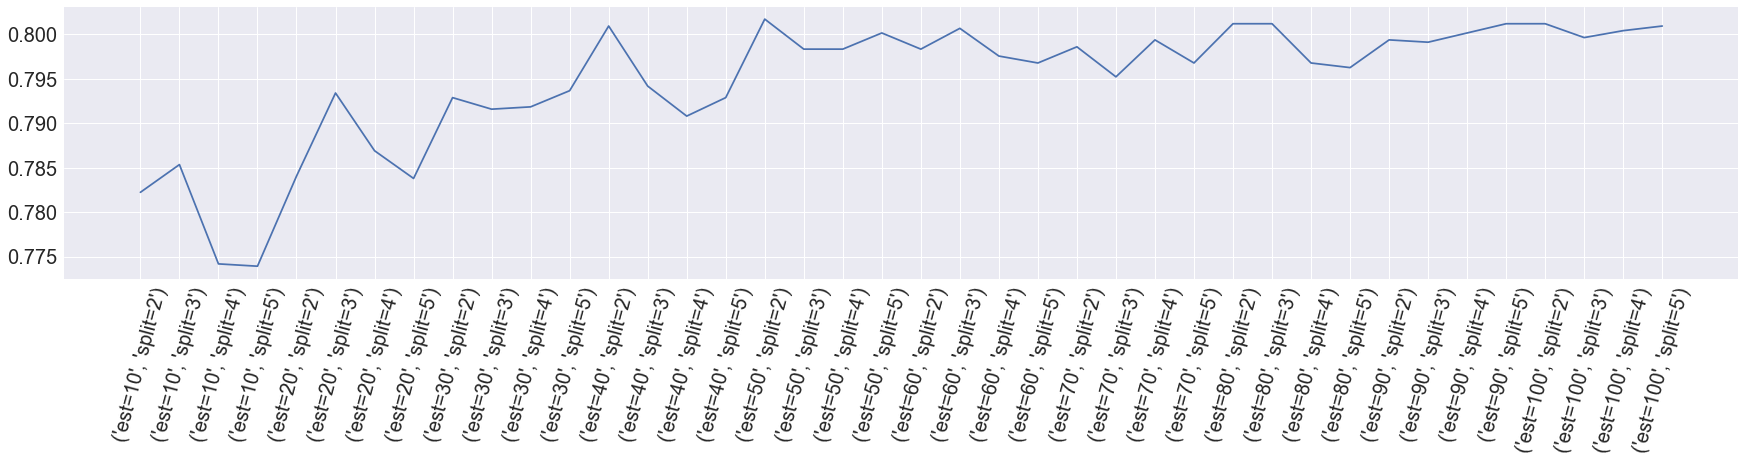

In [102]:
plt.figure(figsize = (30,5))
plt.plot([x for x in range(0,40)], [float(x[3]) for x in y_list]);
plt.xticks([x for x in range(0,40)],[x[0:2] for x in y_list], rotation = 75, fontsize = 20);
plt.yticks(fontsize = 20)
plt.show();

In [103]:
rand_forest = RandomForestClassifier(n_estimators=100, min_samples_split=10)
fit = rand_forest.fit(X_train_up, y_train_up)
vector = (lambda x: 1 if x =='1' else 0)
vfunc = np.vectorize(vector)
y_test_for = vfunc(y_test_up)
y_pred_for = vfunc(rand_forest.predict(X_test_up))
precision_for,recall_for,_ = precision_recall_curve(y_test_for,y_pred_for)
precision_for,recall_for

(array([ 0.73102911,  0.84726027,  1.        ]),
 array([ 1.        ,  0.87948809,  0.        ]))

Feature importances ranked from high to low

In [104]:
sorted(zip(X_train.columns,fit.feature_importances_),key = lambda x: x[1], reverse=True)

[('satfin', 0.13605727138308918),
 ('finrela', 0.075370713780511883),
 ('age', 0.074578673228757941),
 ('finalter', 0.06748350814991122),
 ('indus10', 0.064397761823759017),
 ('year', 0.062421371208944171),
 ('partyid', 0.043191330953802939),
 ('earnrs', 0.040039136104218193),
 ('polviews', 0.034824947510190038),
 ('natrace', 0.024621385423645985),
 ('natarms', 0.023634705170776239),
 ('natfare', 0.023516180017029157),
 ('natcity', 0.022979226344706064),
 ('mobile16', 0.021426935579763016),
 ('natenvir', 0.019203754552350894),
 ('fund', 0.019196049425682437),
 ('raclive', 0.018972748613604429),
 ('natdrug', 0.018891360163069106),
 ('nataid', 0.018424496290992621),
 ('comprend', 0.018151532289877977),
 ('nateduc', 0.018149089728694803),
 ('natheal', 0.018089419975691634),
 ('coop', 0.016654474566319556),
 ('race_White', 0.014096130061361074),
 ('sex_Male', 0.012527216460322385),
 ('wrkstat_Working fulltime', 0.011448847966756392),
 ('relig_Protestant', 0.010205434018958515),
 ('relig_Ca

Group feature importances by year

In [105]:
GSS_year = {k: v for k, v in GSS3.groupby('year')}

features_dict = {}
for k,v in GSS_year.items():
    X = v[columns]

    y = v['happy']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    rand_forest = RandomForestClassifier(n_estimators=30, min_samples_split=2)
    fit = rand_forest.fit(X_train, y_train)
    features=sorted(zip(X_train.columns,fit.feature_importances_),key = lambda x: x[1], reverse=True)
    features_dict[k] = features

Group feature importances by year and plot them

In [106]:
feat_by_year = defaultdict(list)

for k,v in features_dict.items():
    for i,j in v:
        feat_by_year[i].append({k:j})

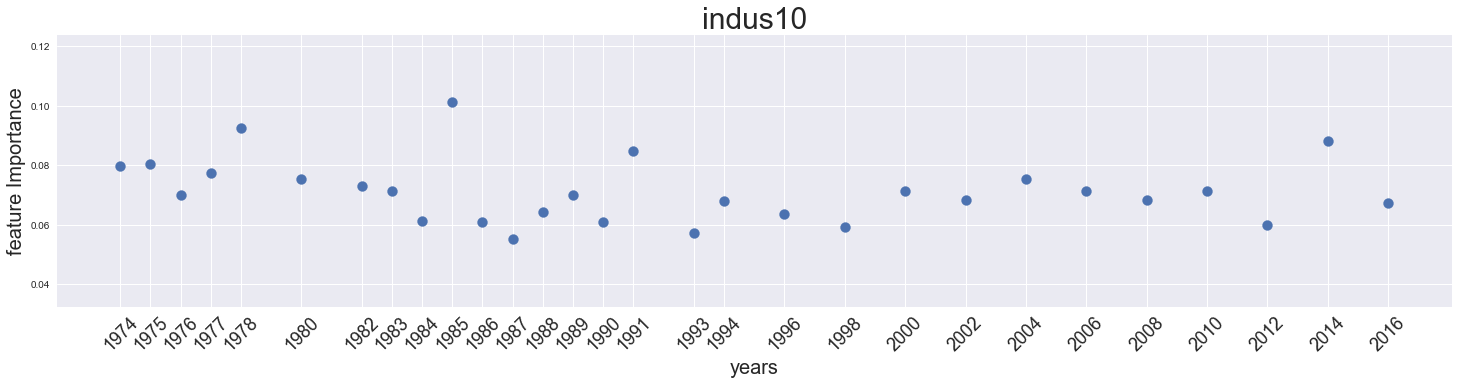

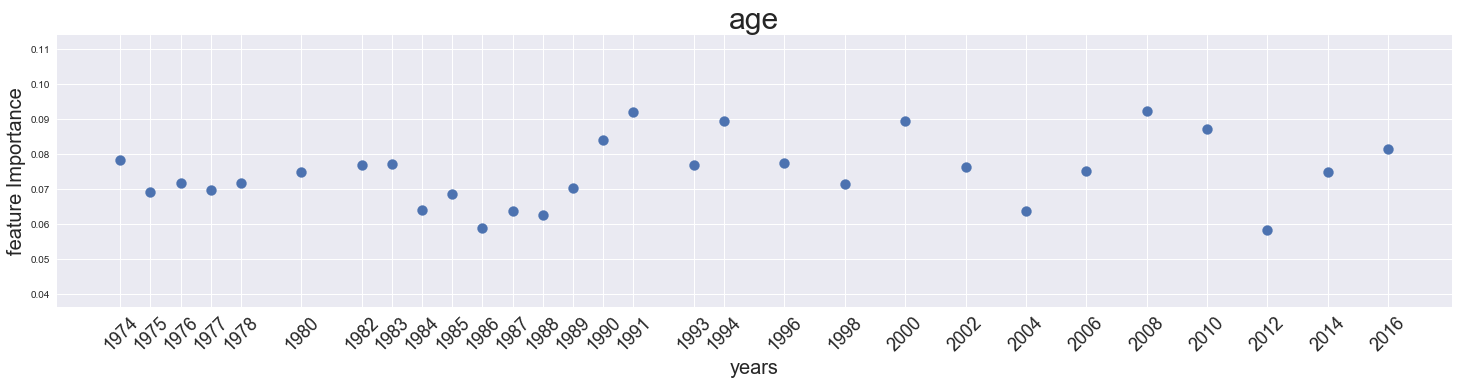

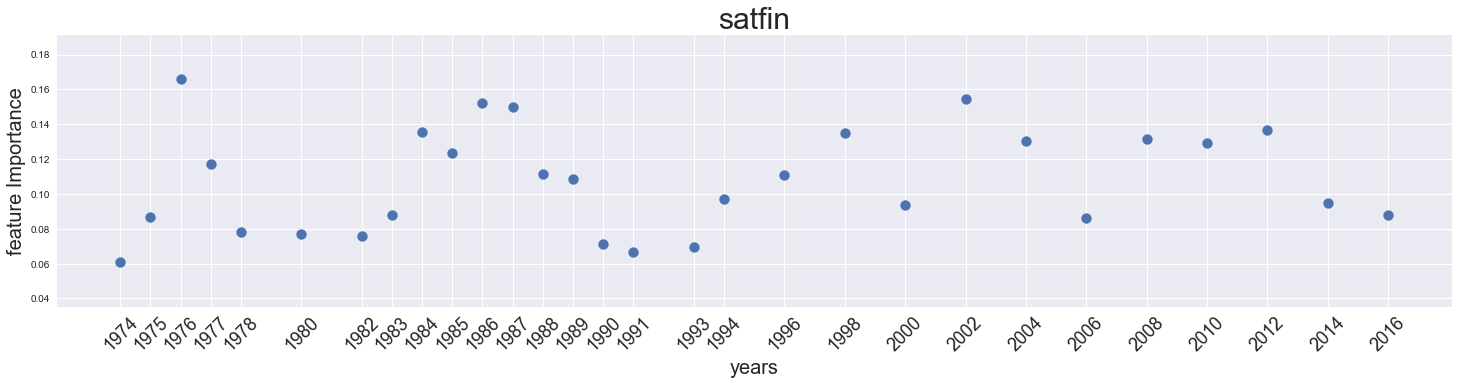

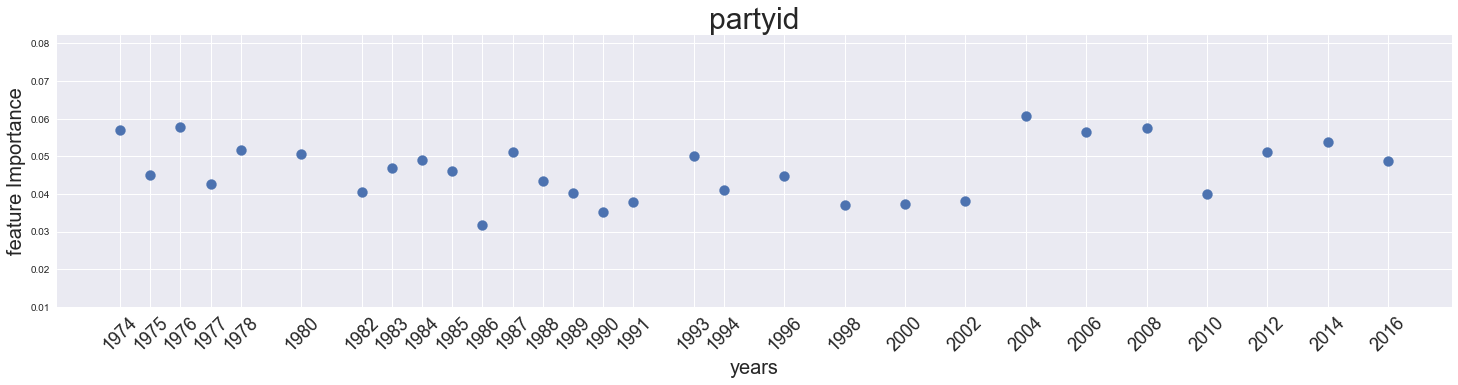

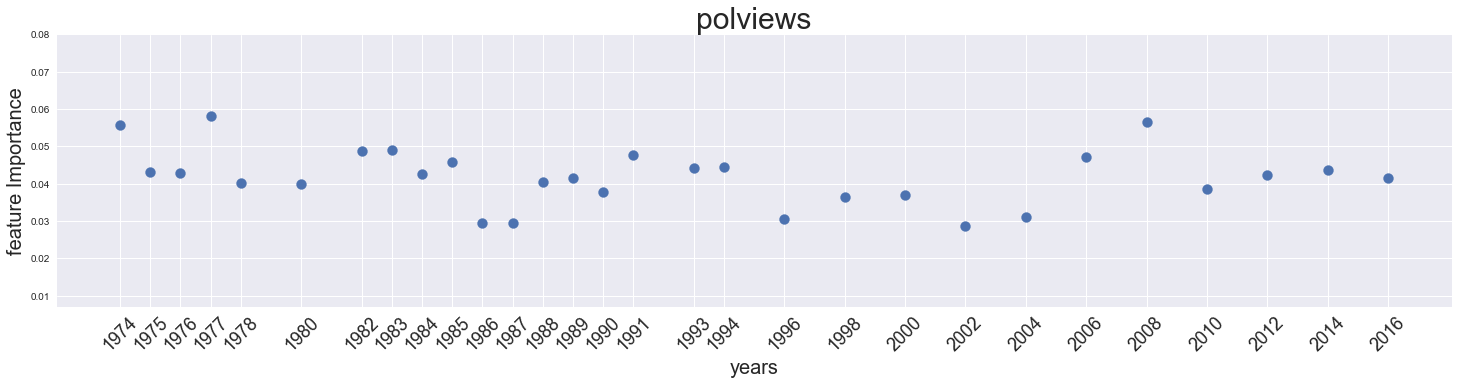

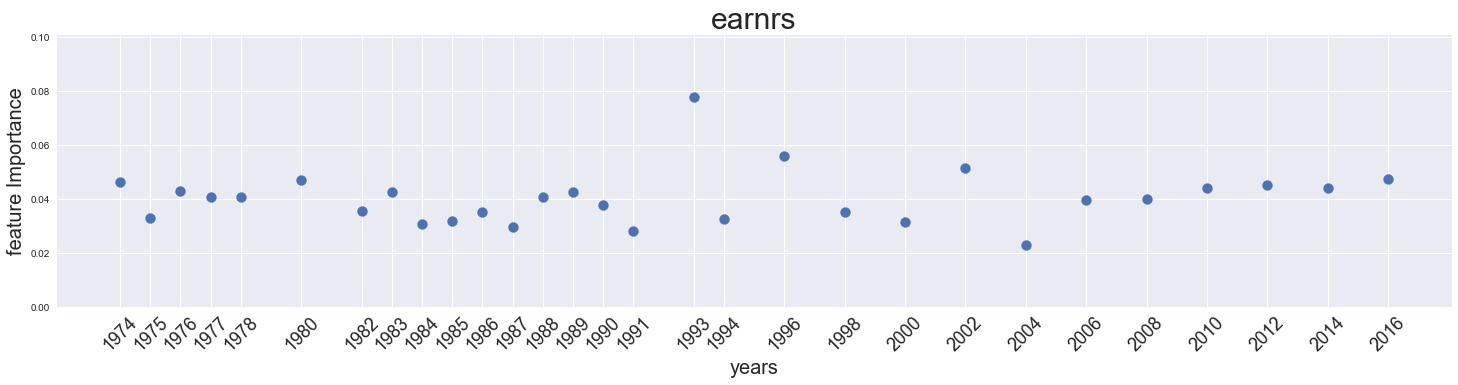

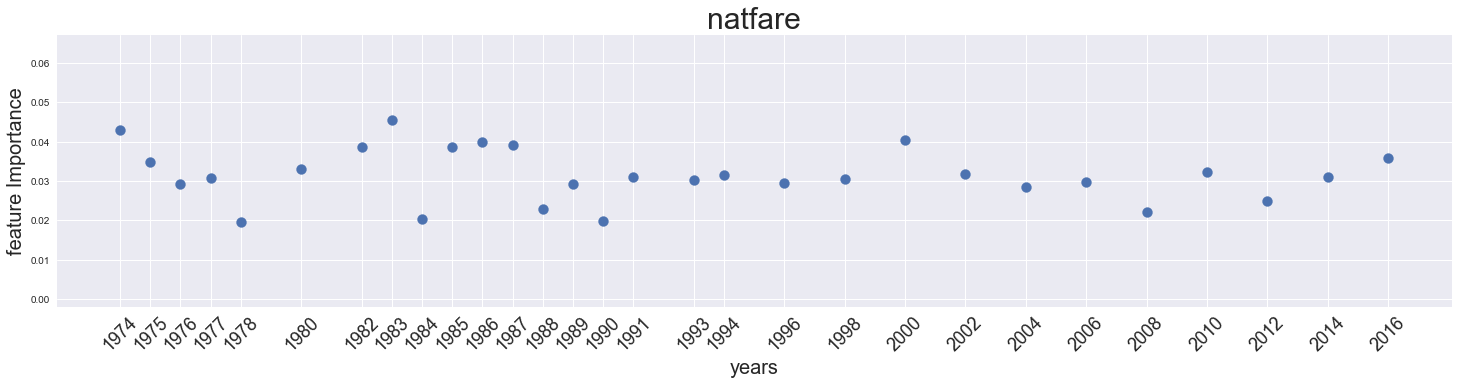

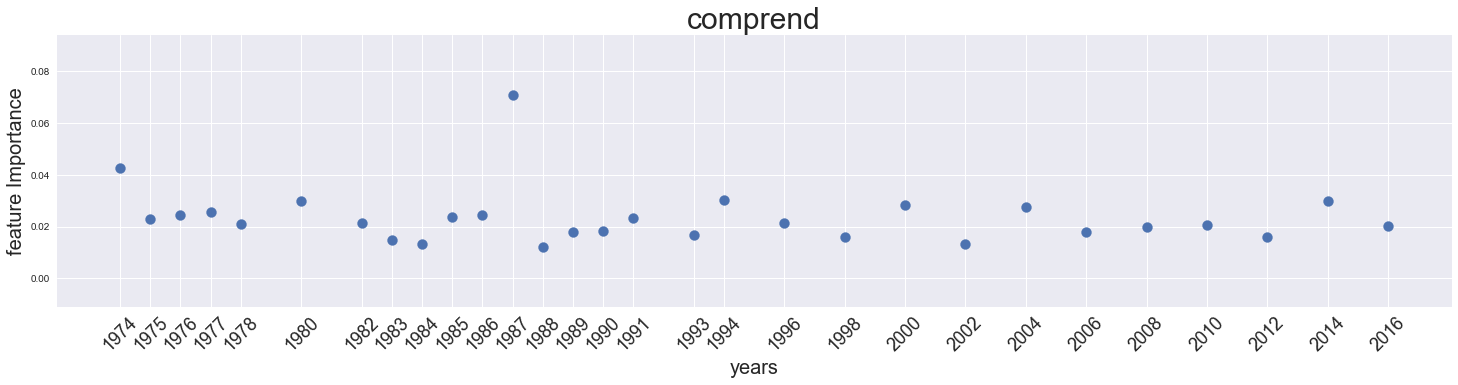

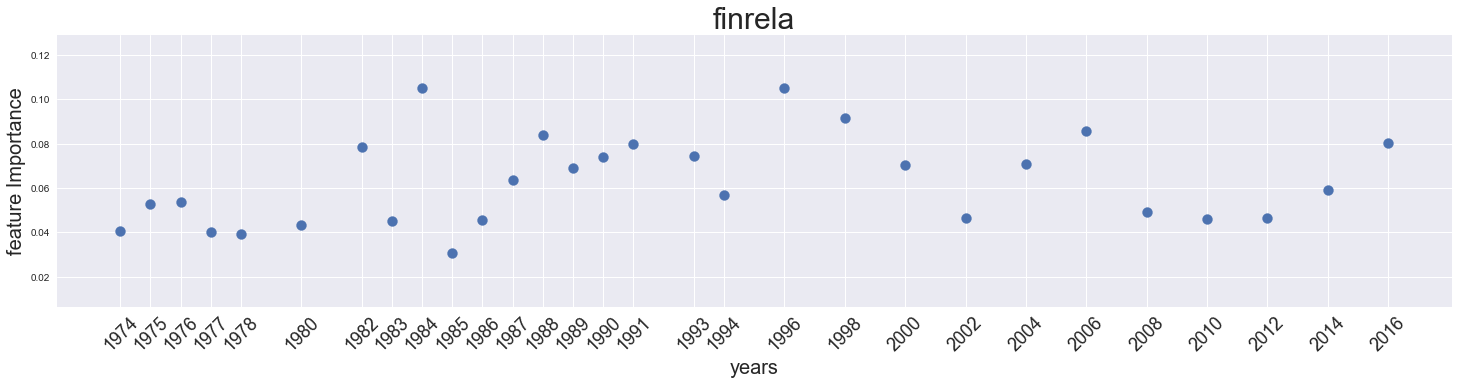

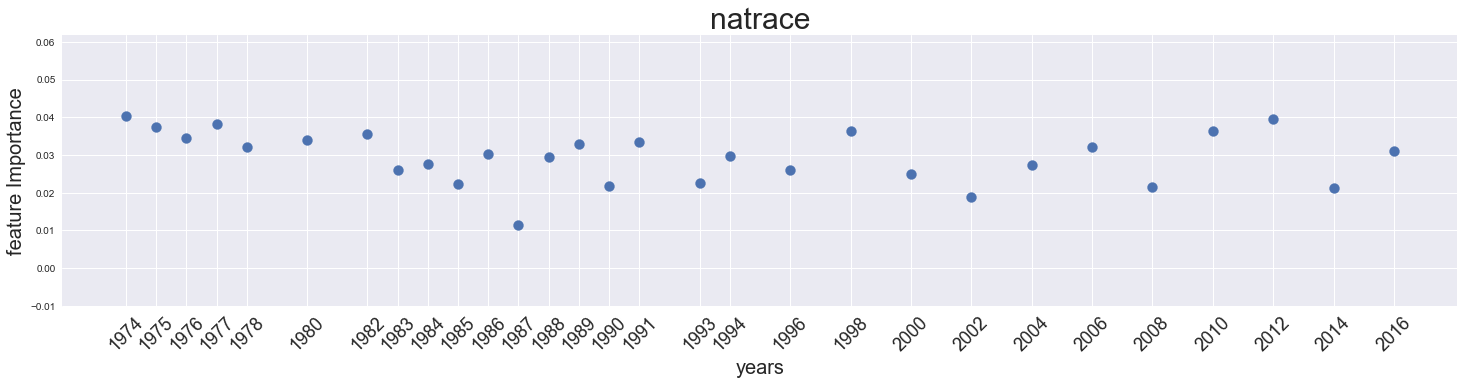

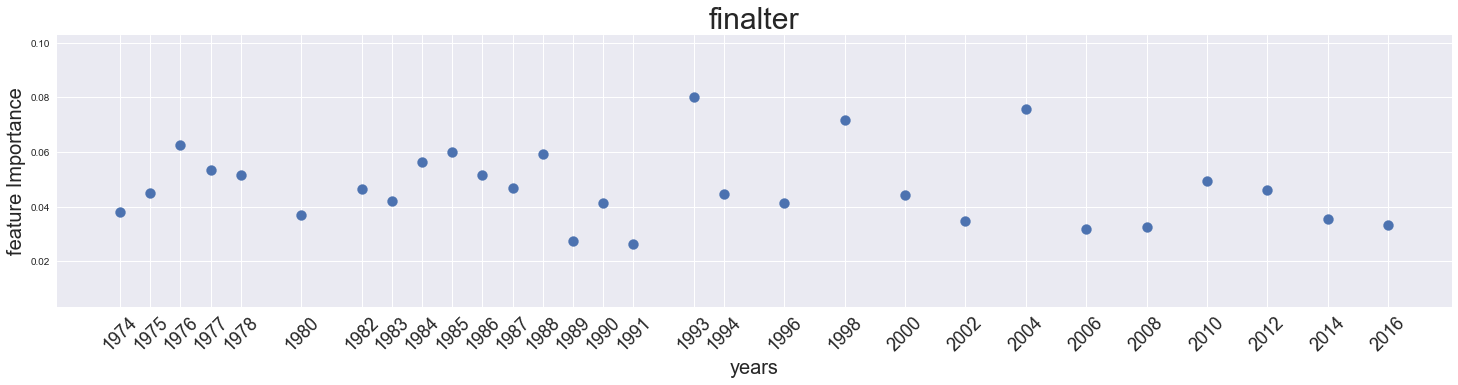

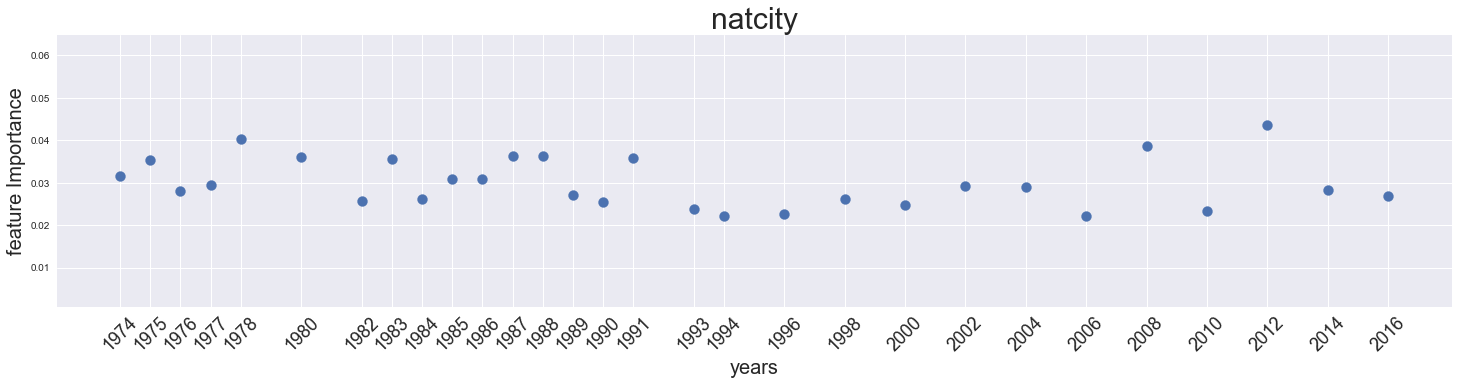

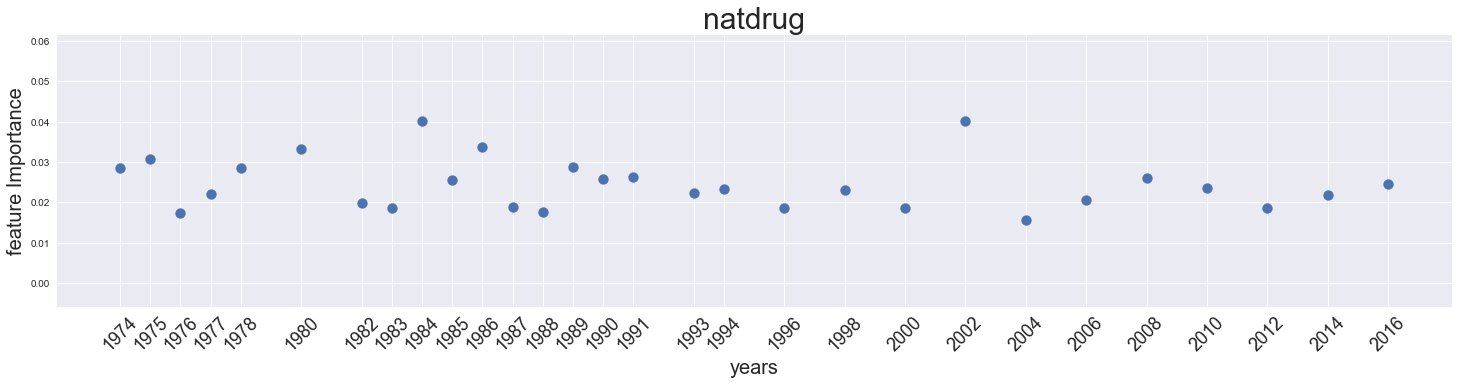

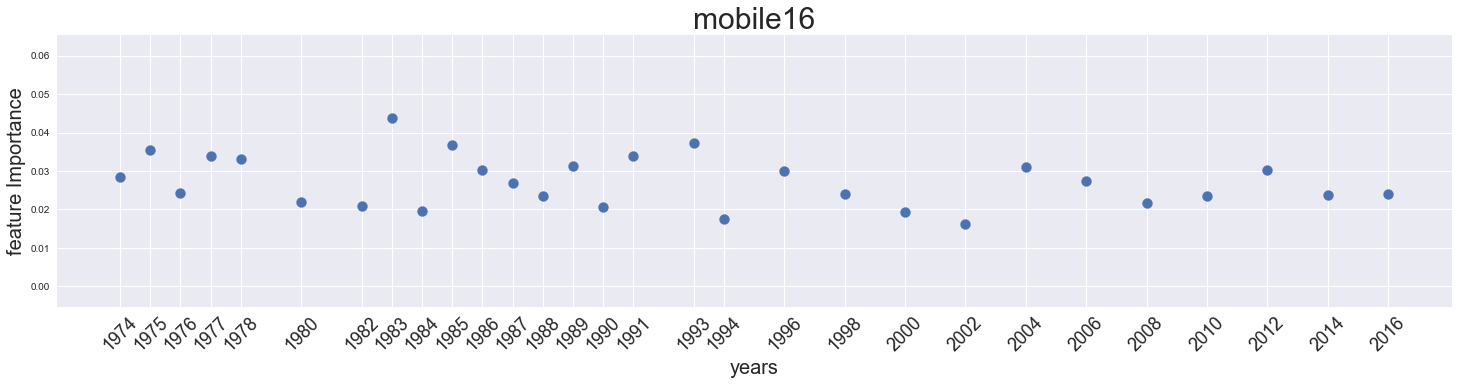

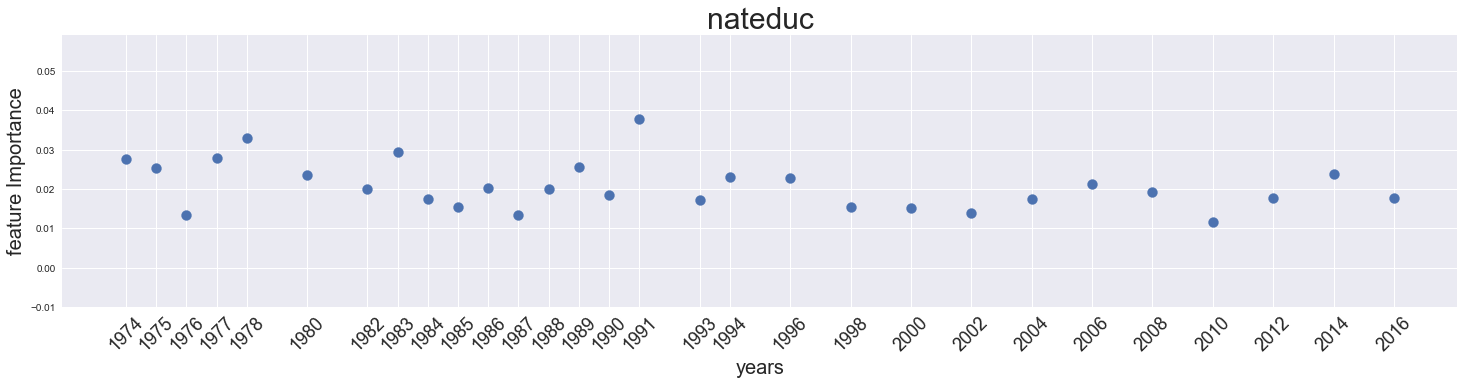

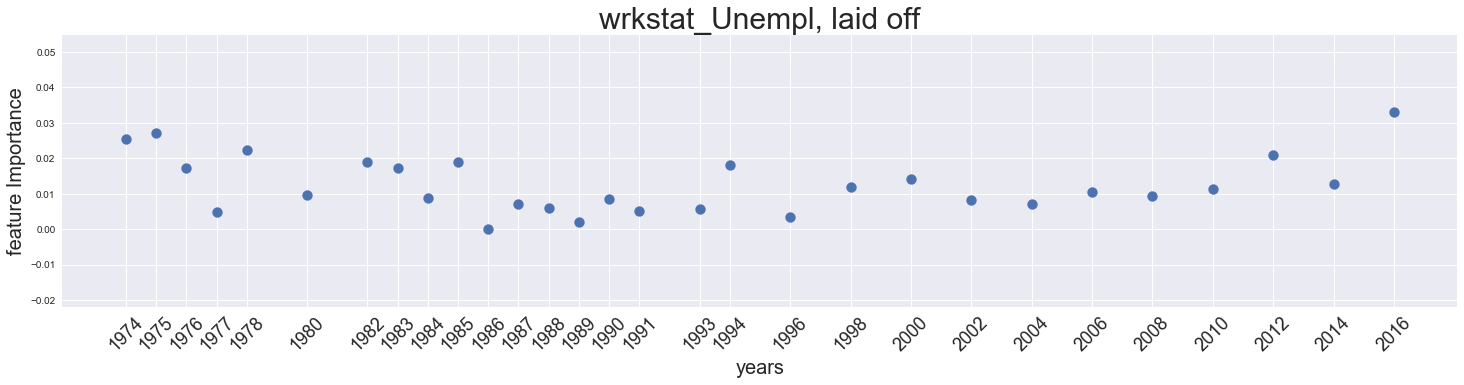

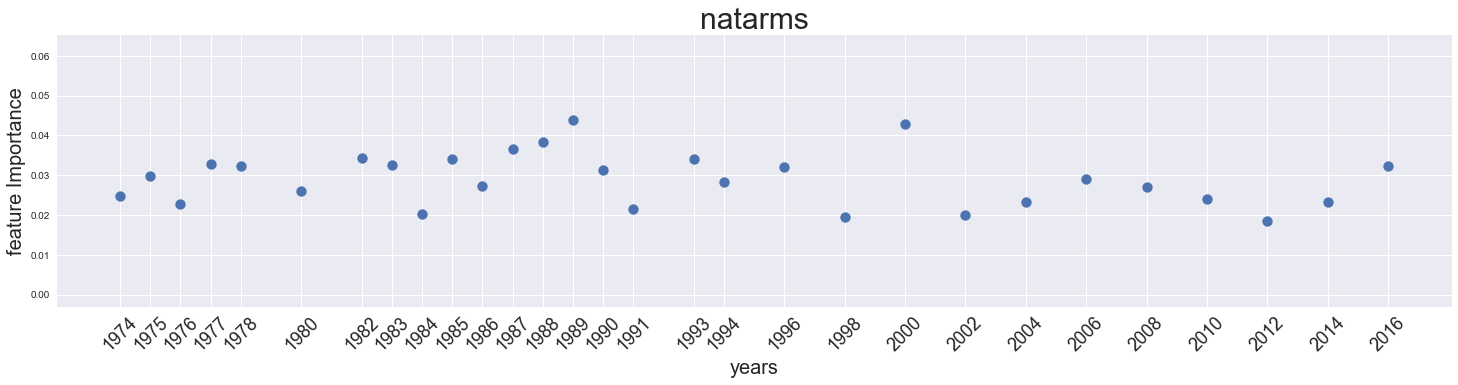

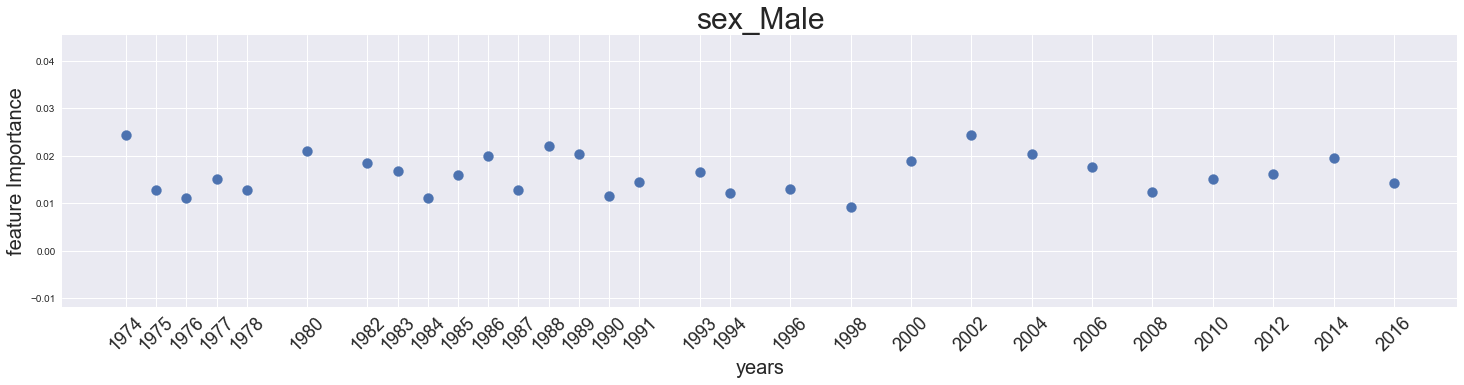

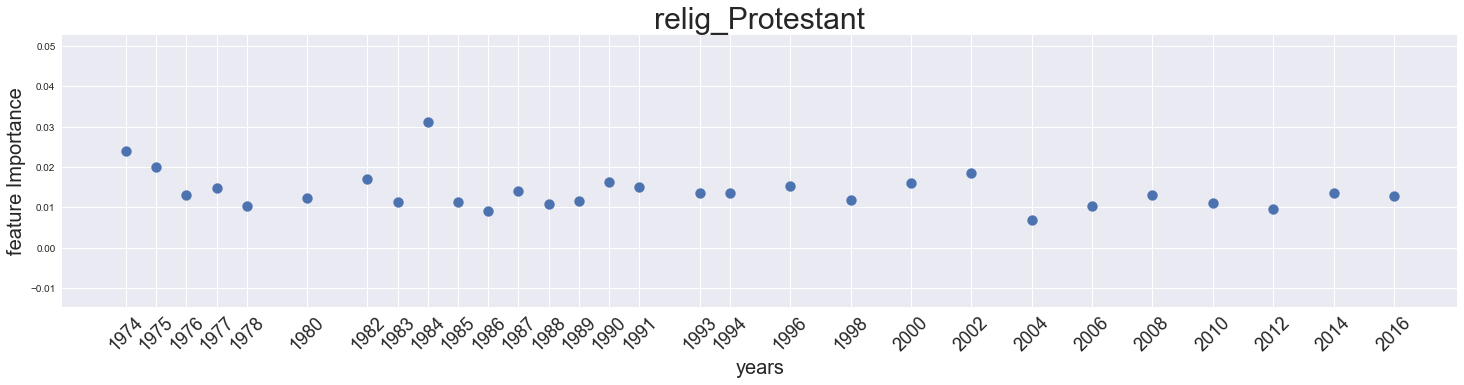

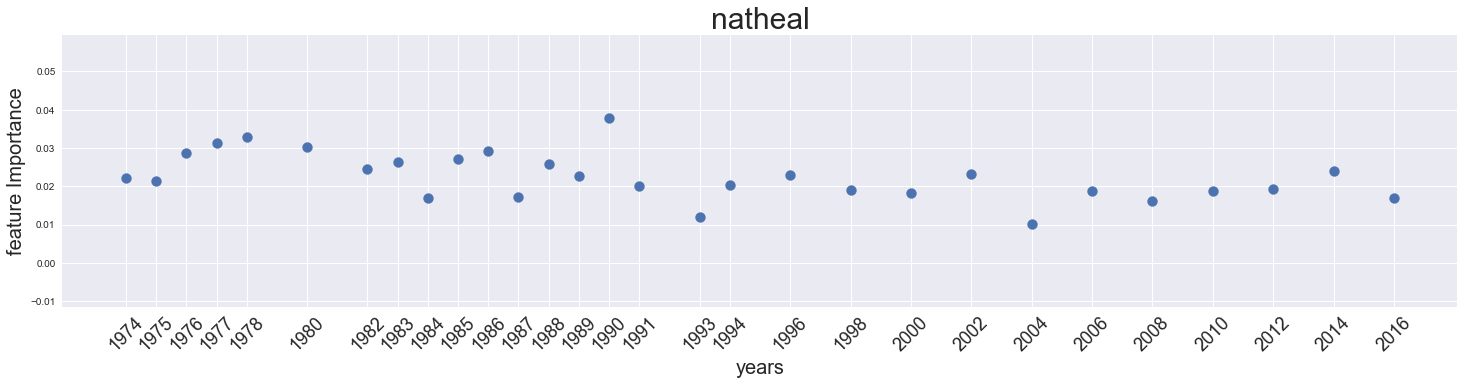

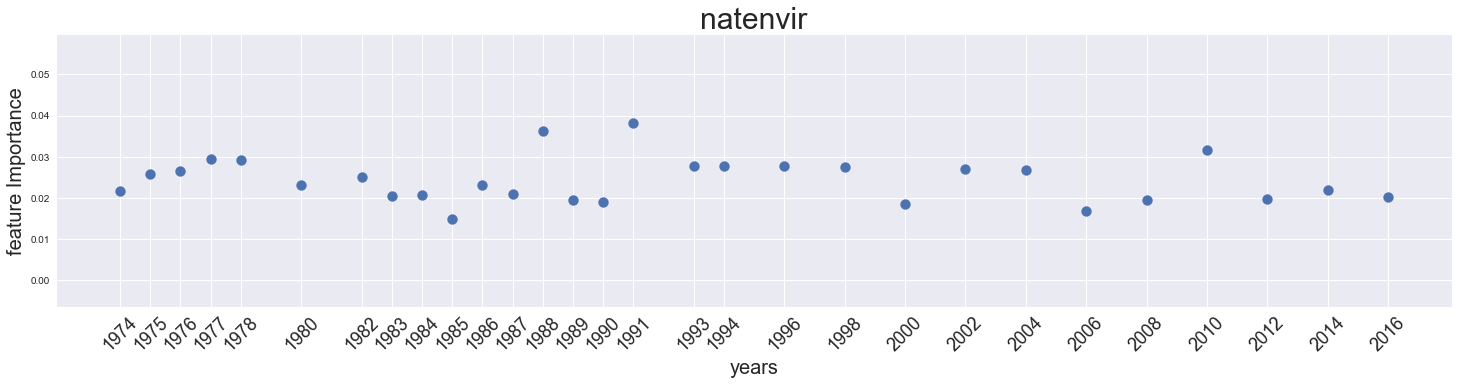

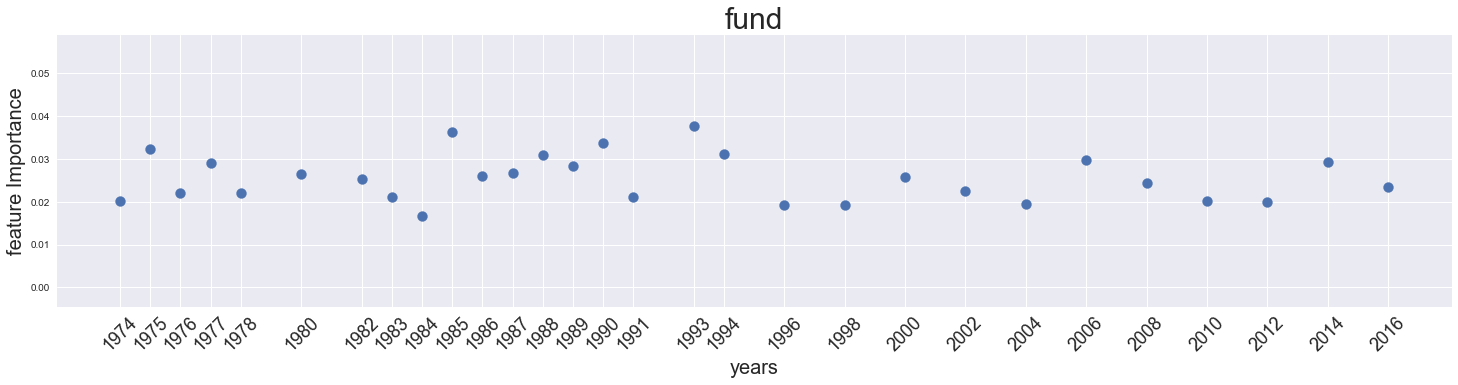

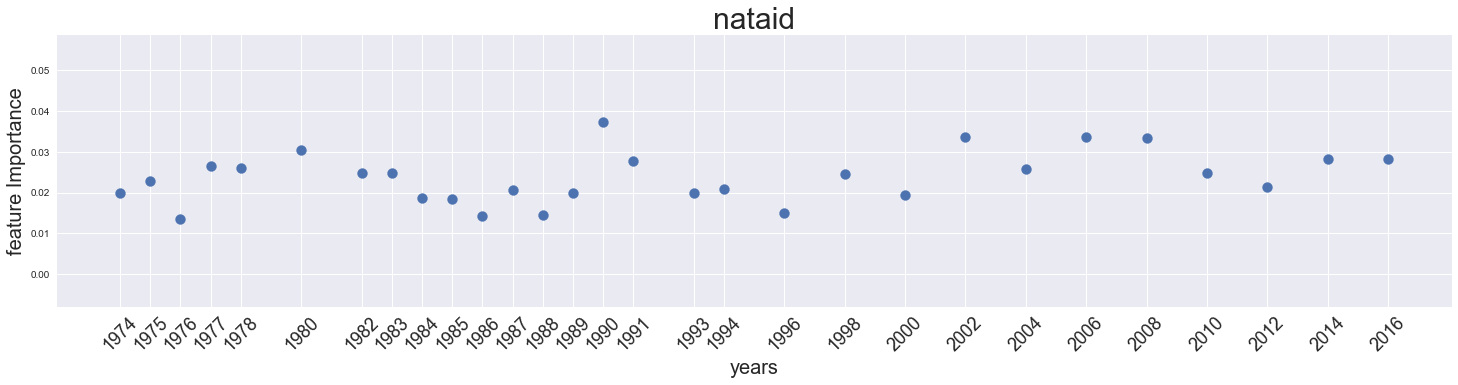

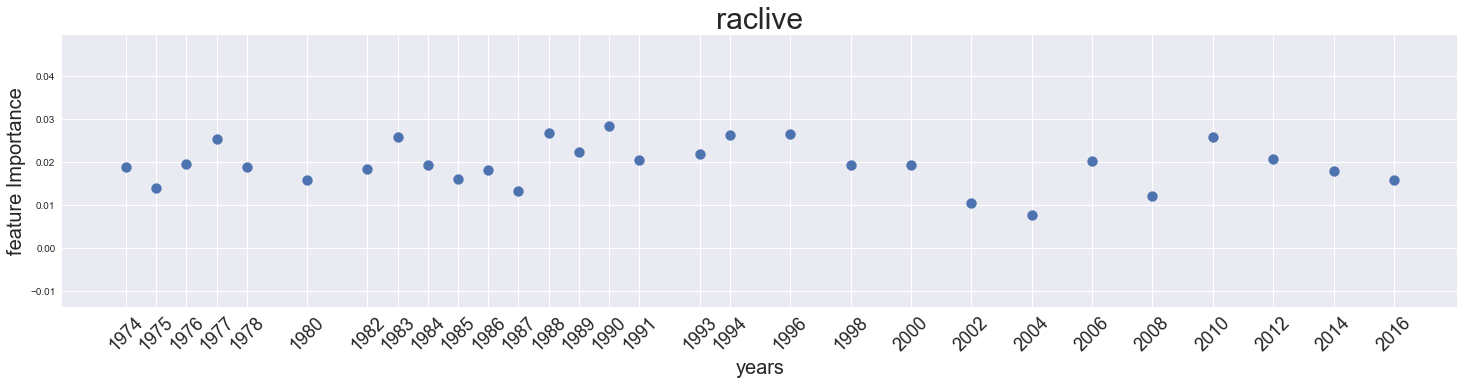

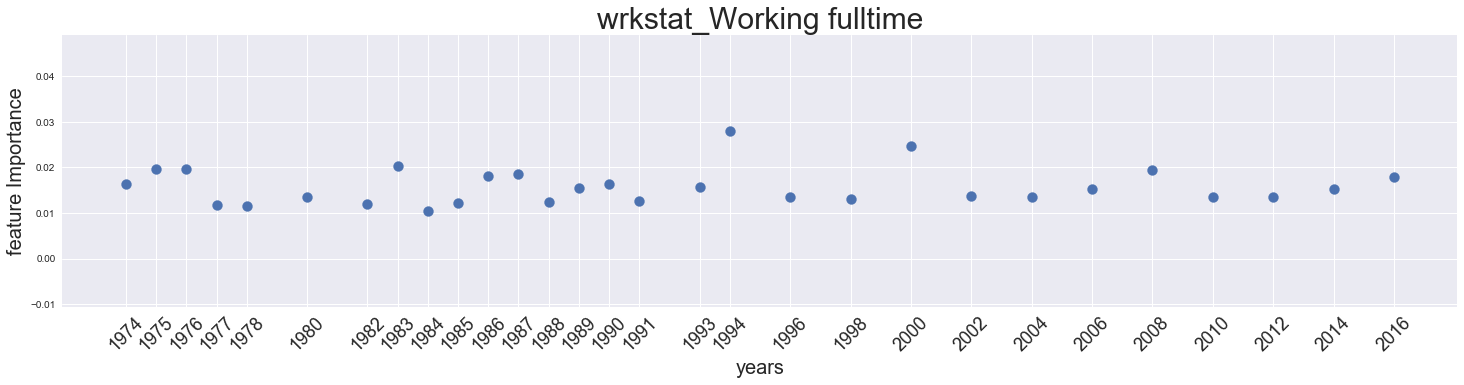

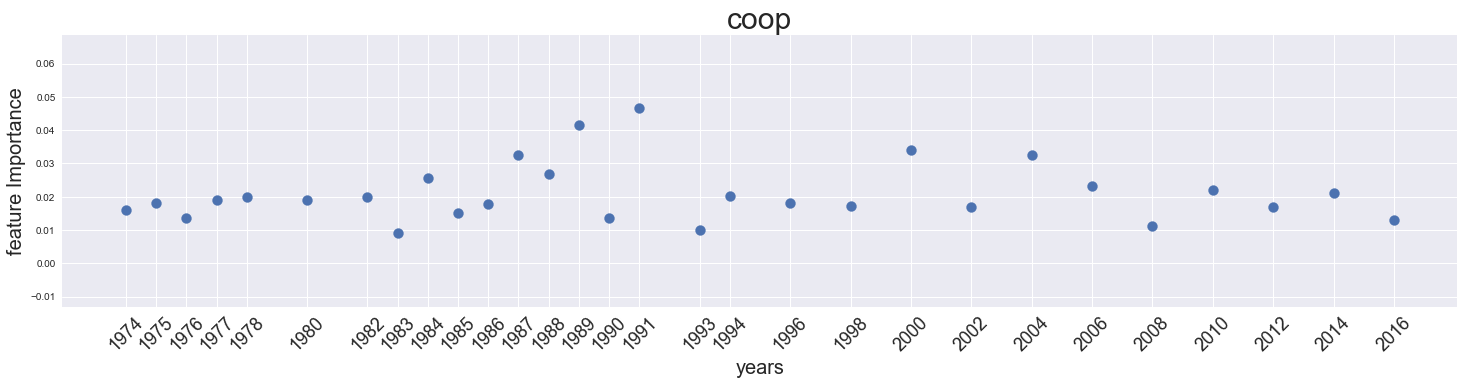

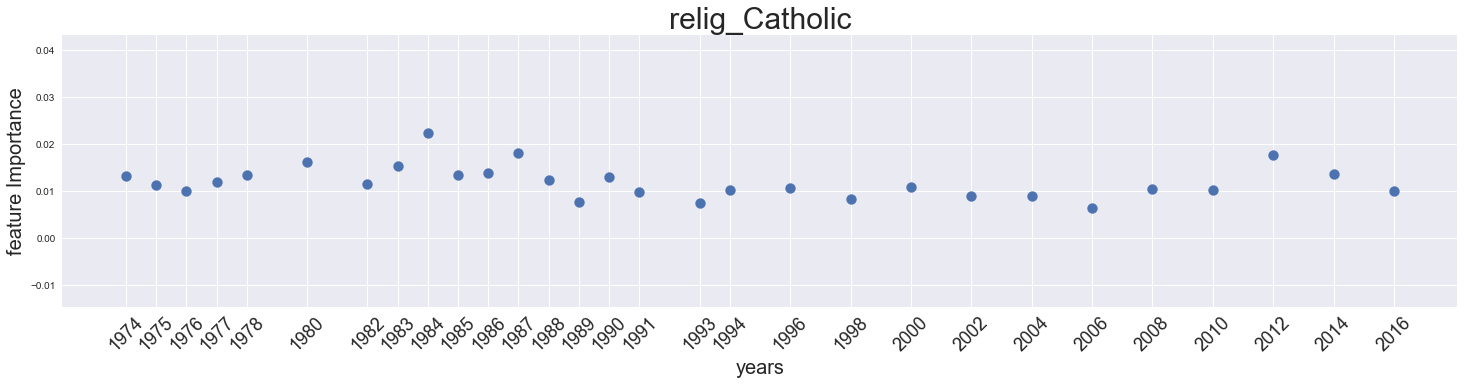

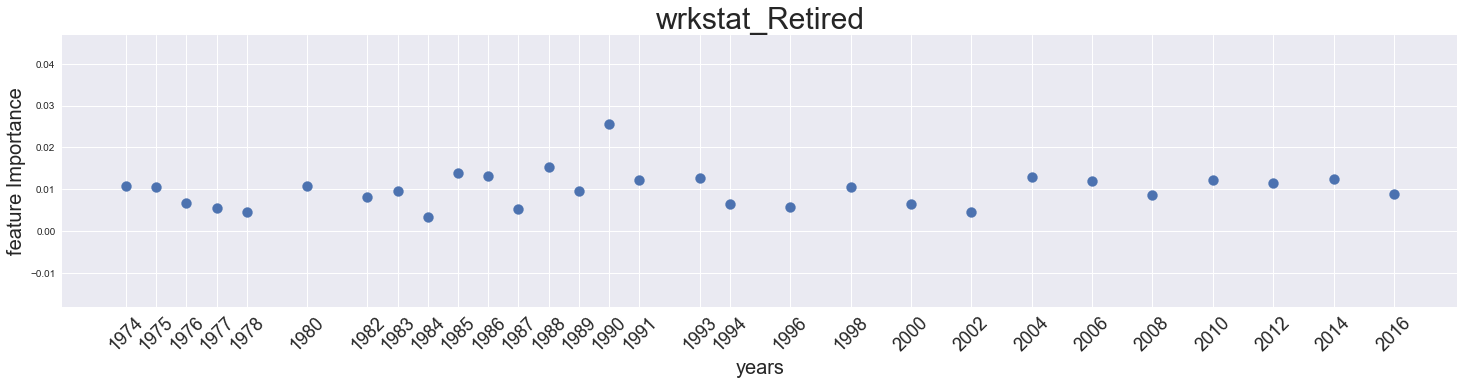

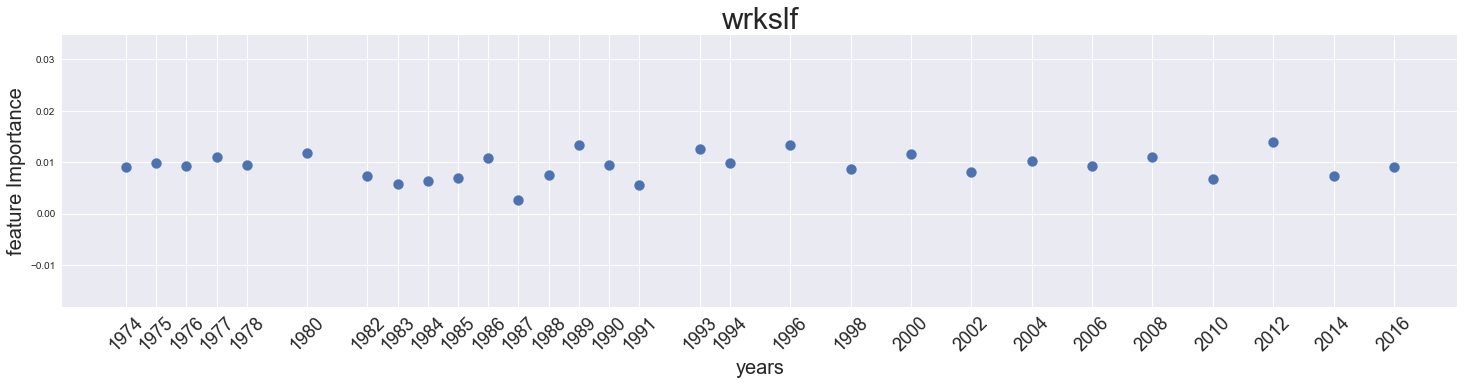

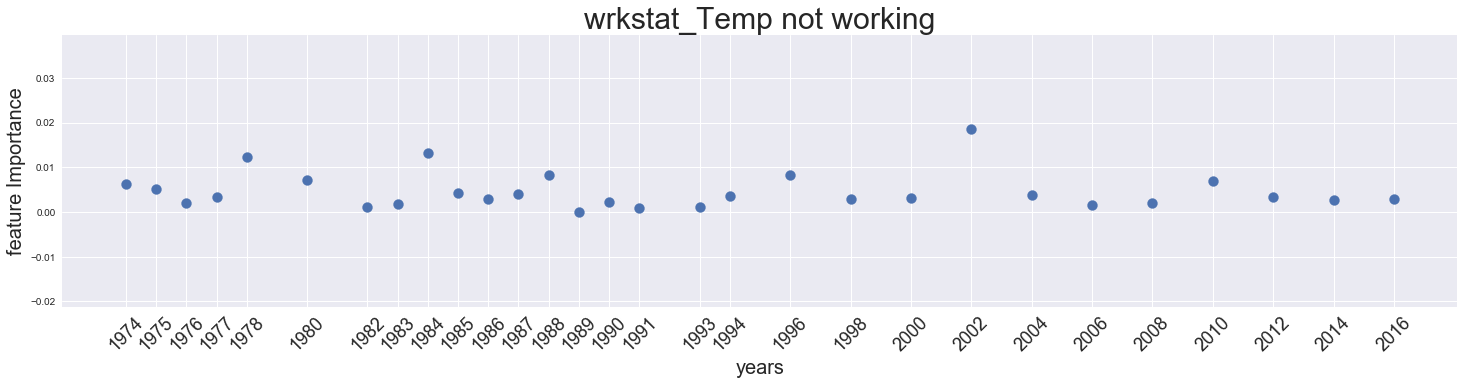

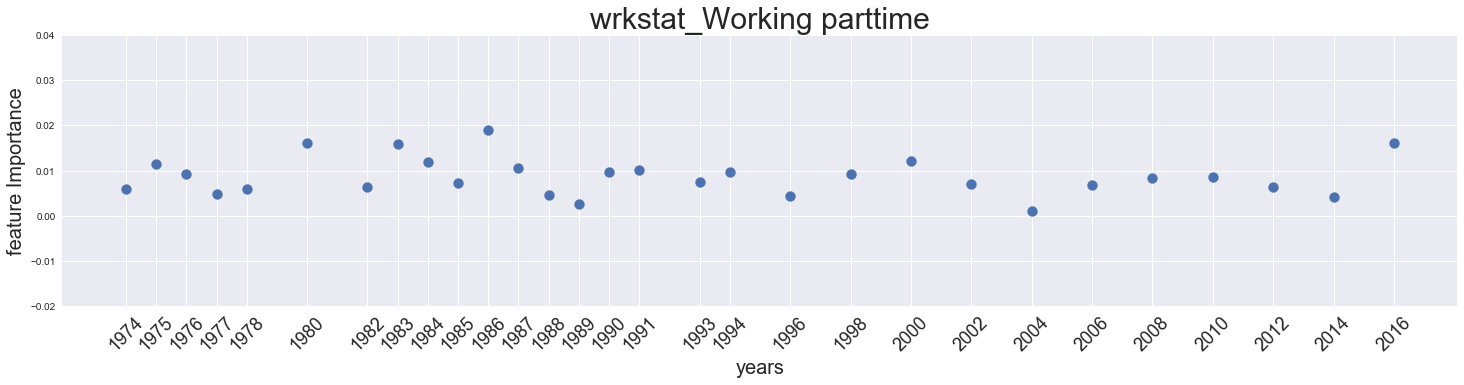

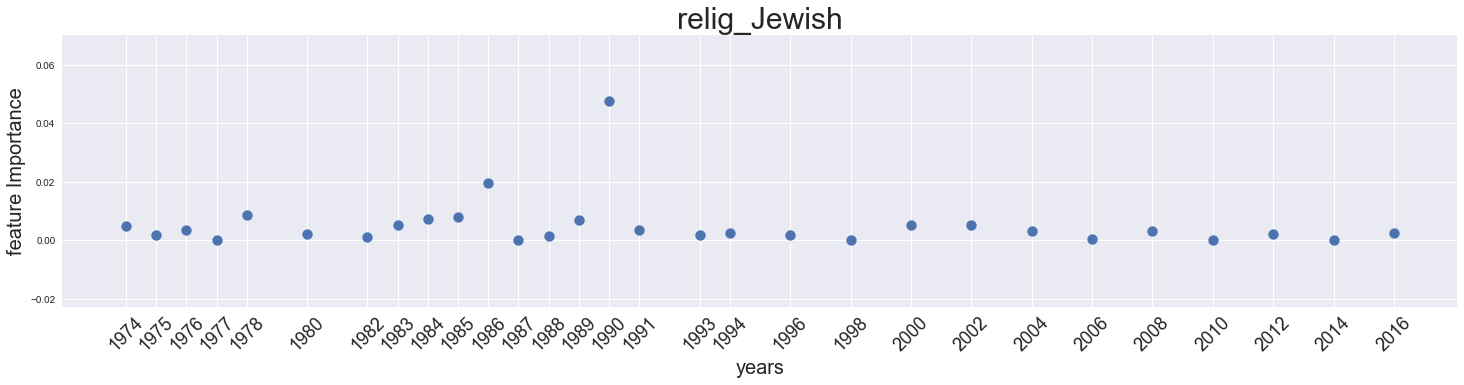

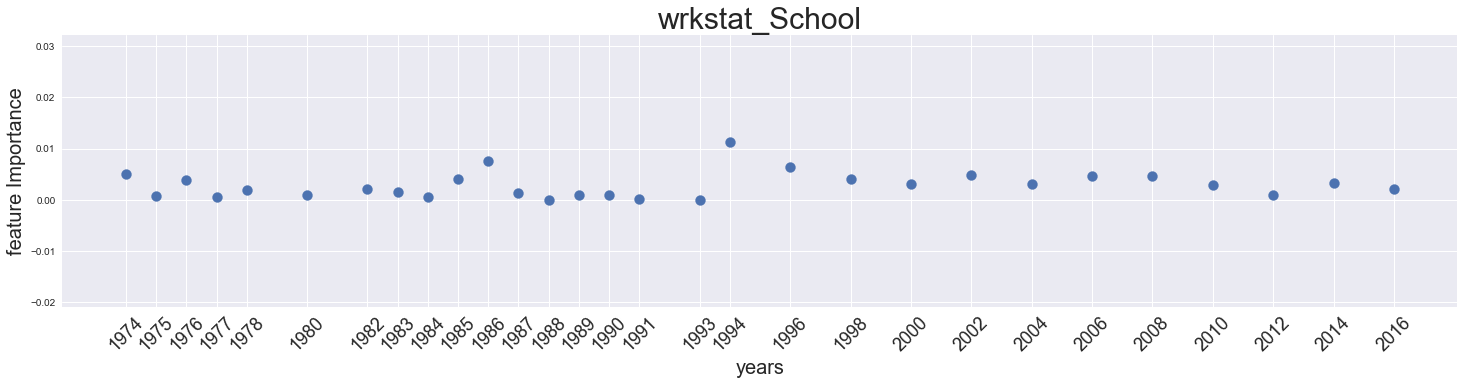

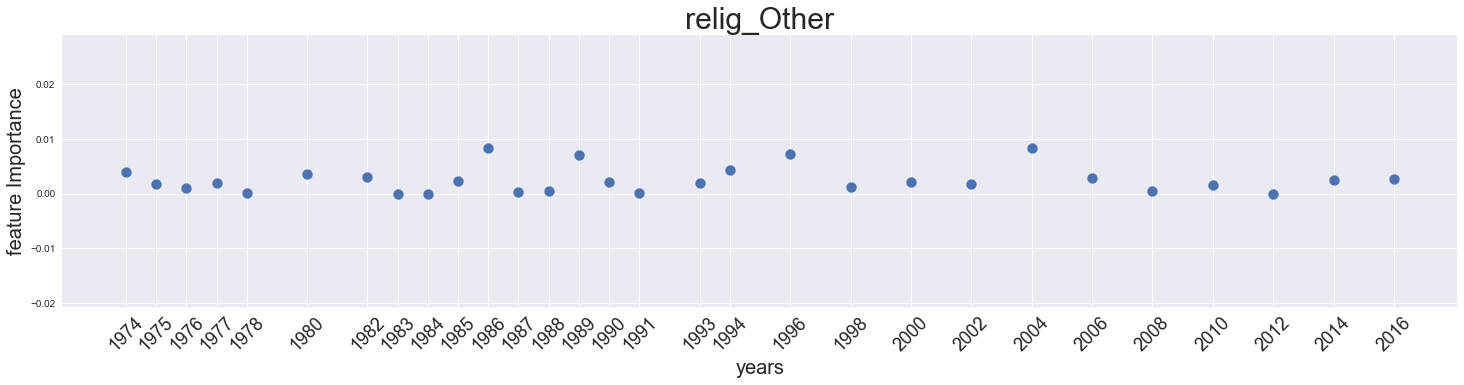

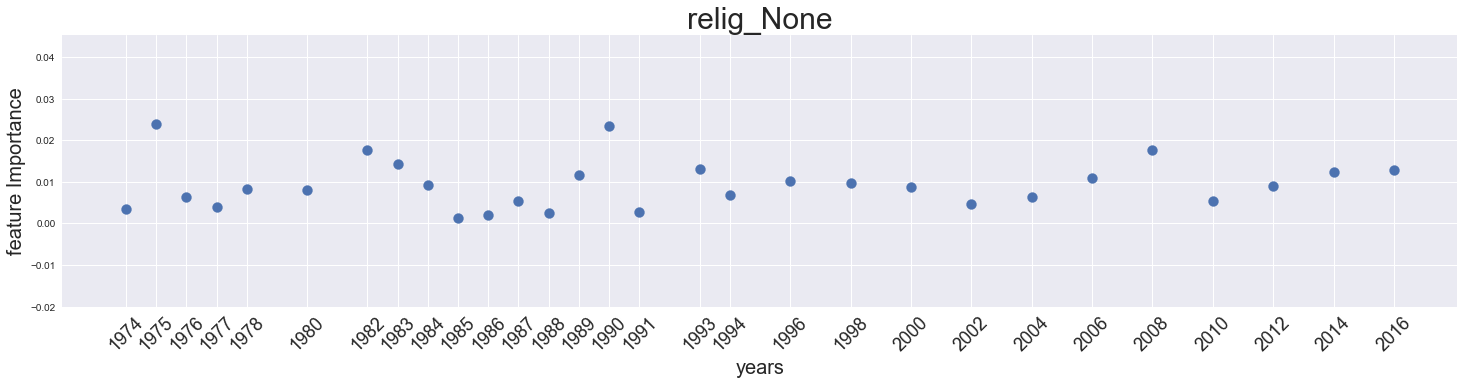

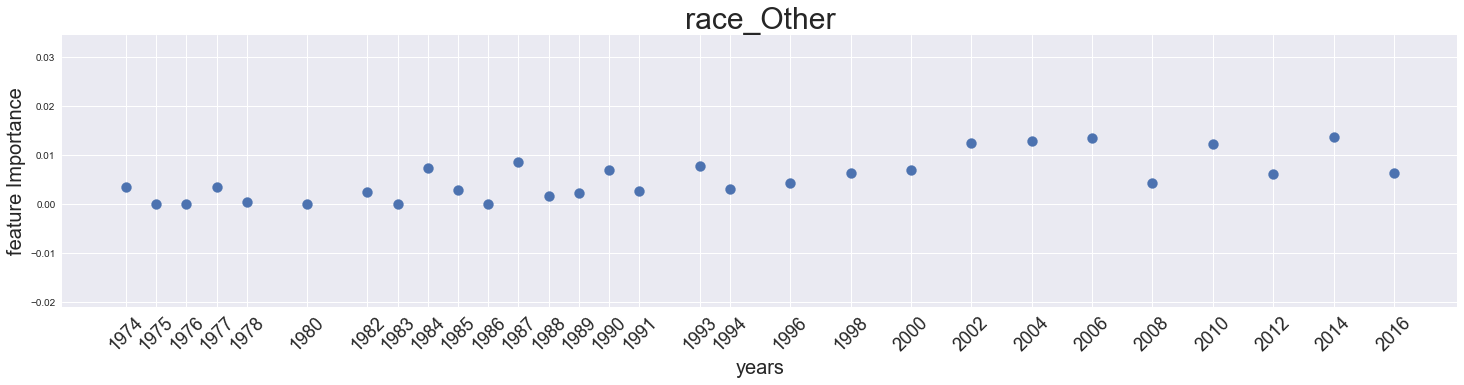

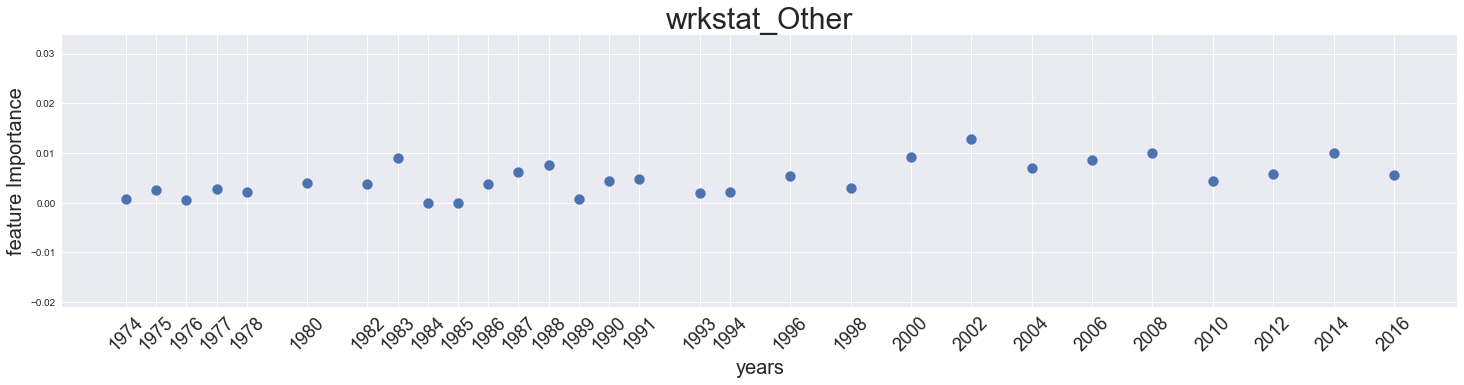

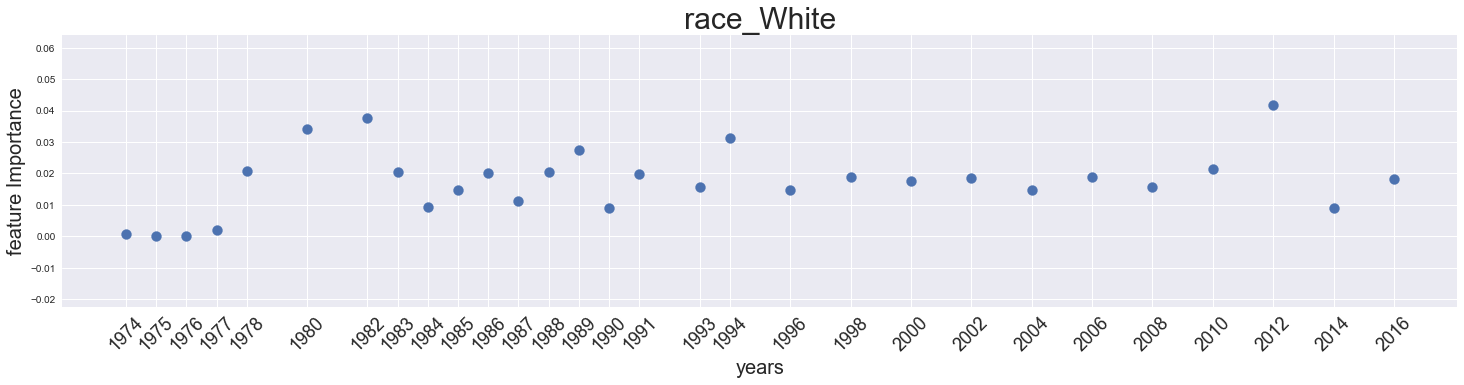

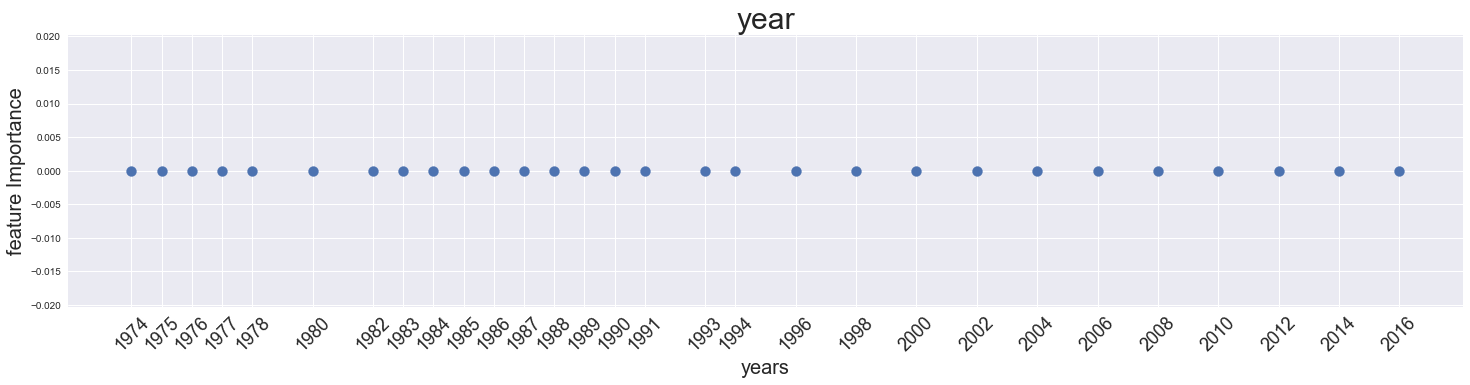

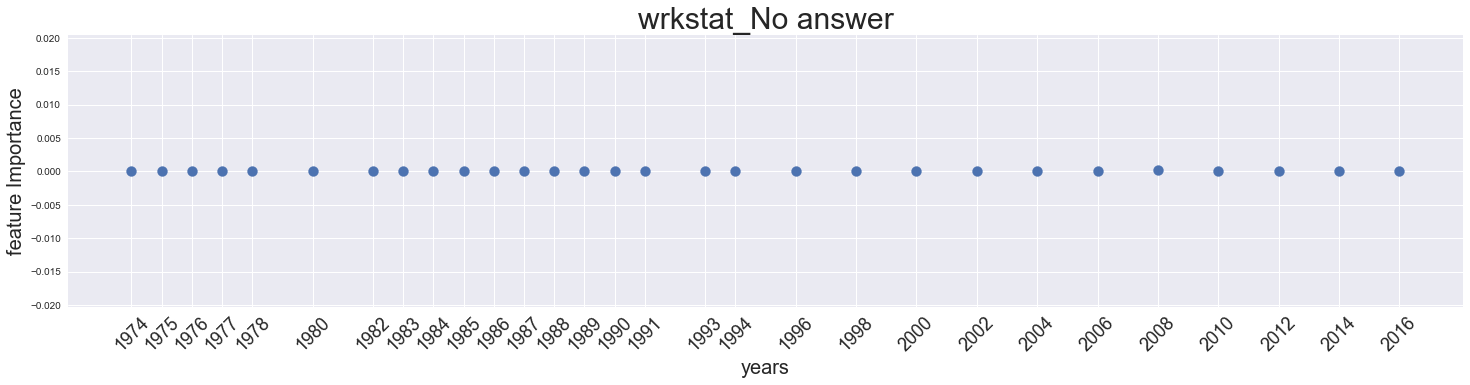

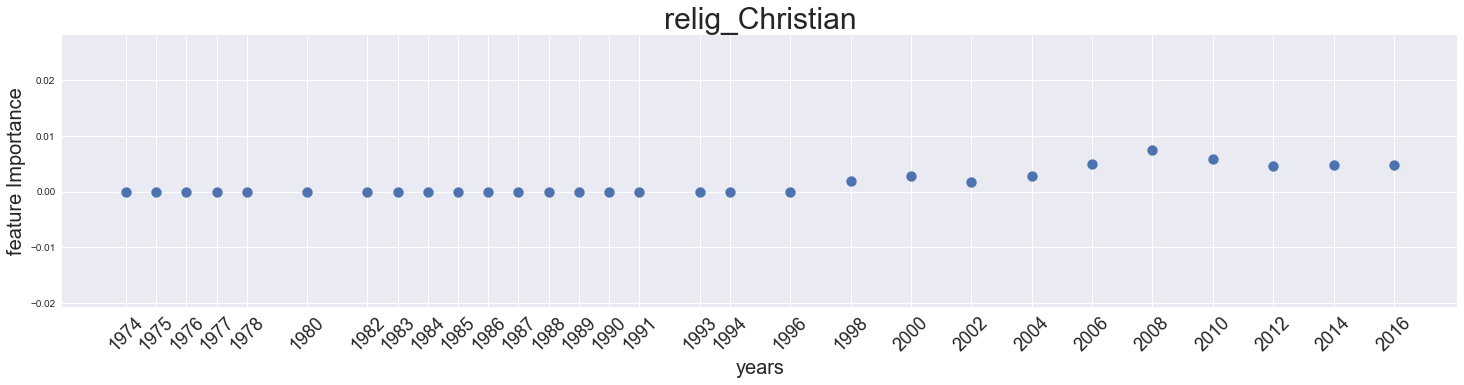

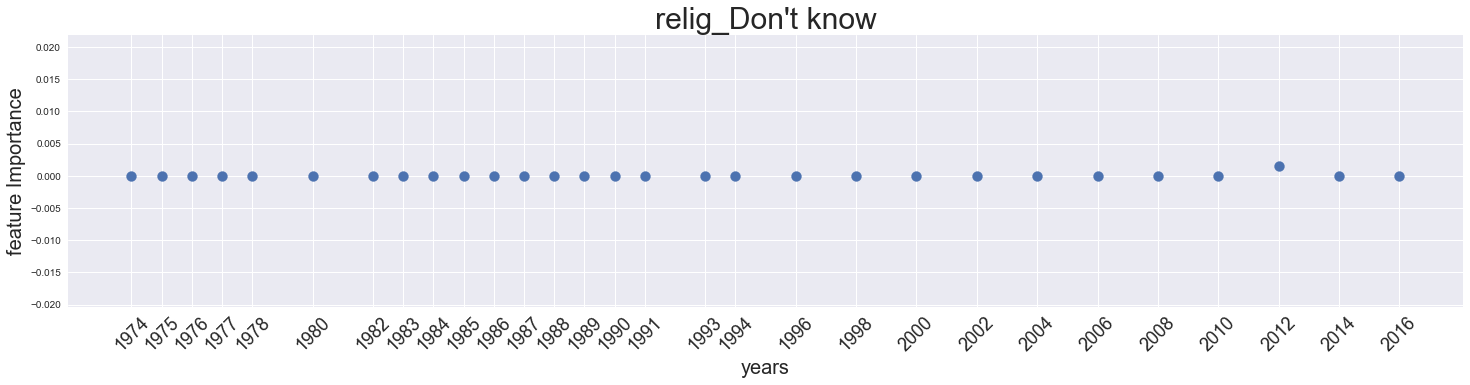

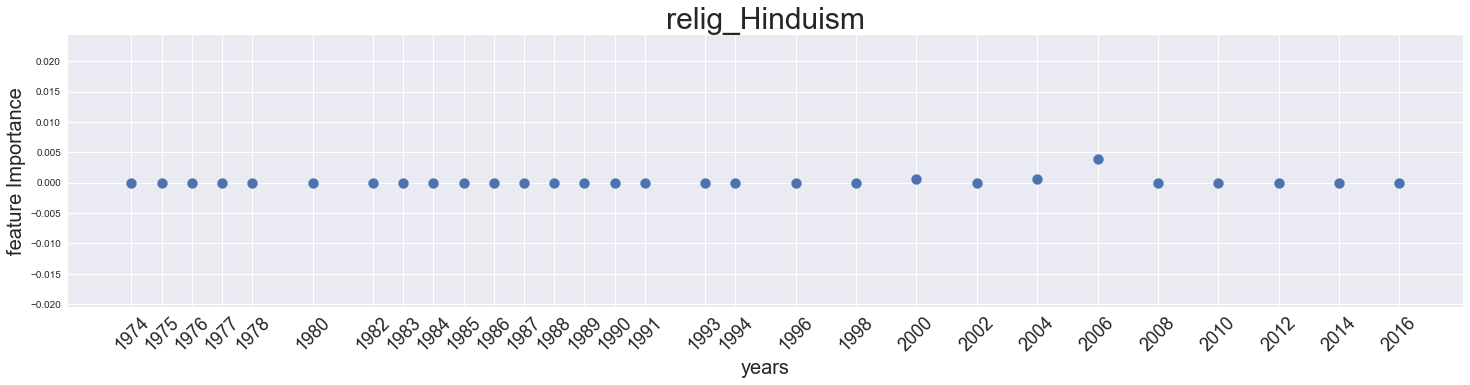

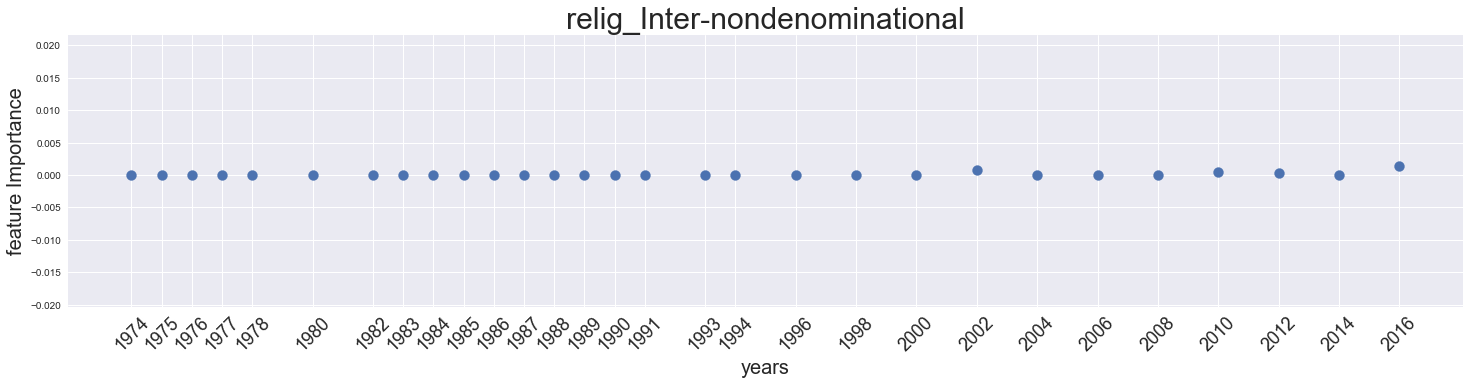

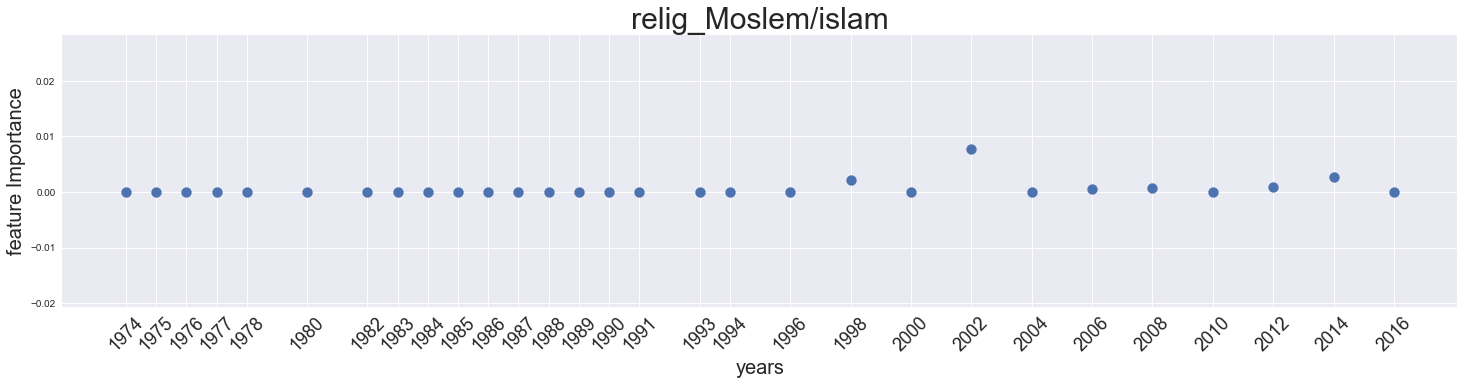

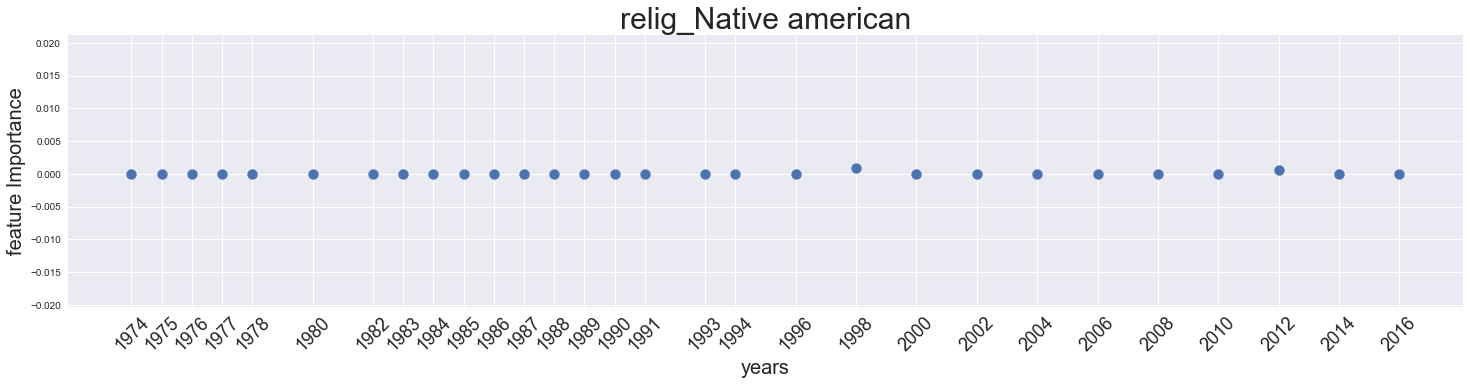

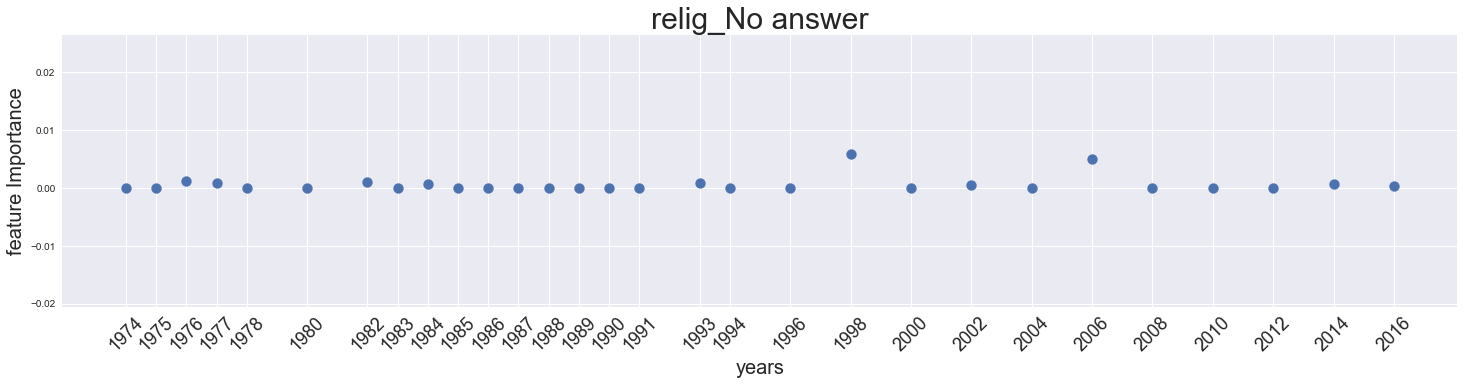

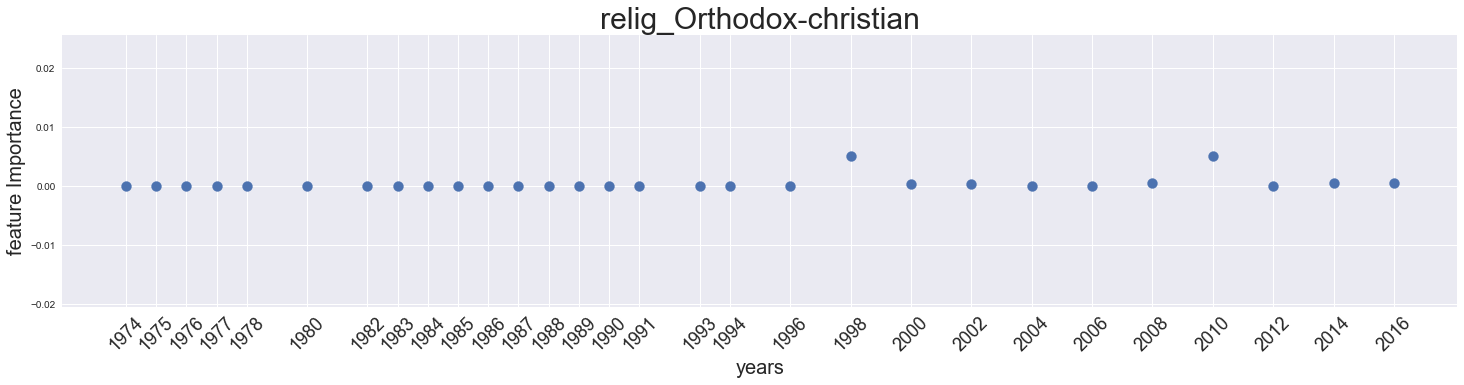

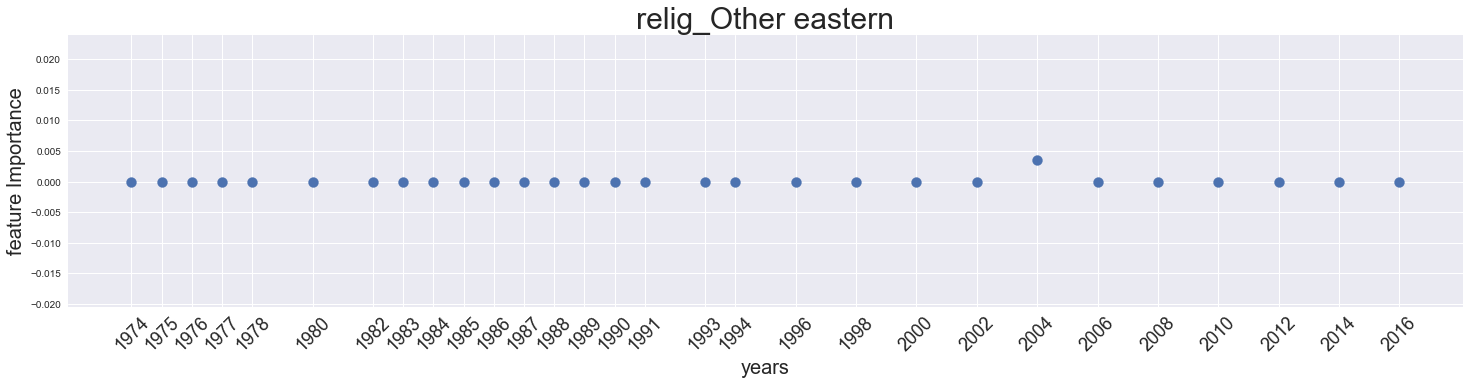

In [107]:
years = [1974, 1975, 1976, 1977, 1978, 1980, 1982, 1983, 1984, 1985, 1986, 1987, 1988,1989,
 1990, 1991, 1993, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016]

def feature_trends(feature):
    trend_list = []
    for x in feat_by_year[feature]:
        for k,v in x.items():
            trend_list.append(v)
    return trend_list

def all_trends(features_dict):
    feat_list = defaultdict()
    for k,v in features_dict.items():
        for i in v:
            feat_list[i[0]] = i[1]
    for index, i in enumerate(feat_list):
        plt.figure(figsize=(25, 5));
        plt.scatter(years, feature_trends(i),s=100);
        plt.title(i, fontsize = 30);
        plt.xlabel('years', fontsize = 20);
        plt.ylabel('feature Importance', fontsize = 20);
        plt.xticks([x for x in years], years, fontsize = 18, rotation = 45);
        plt.show();
        
            
all_trends(features_dict);

Run classification model using logistic regression

In [108]:
pd.set_option('display.precision', 6)

X_train_log = X_train_up
X_train_log = X_train_log.astype('float64') # change all train set features to floats
scaler = MinMaxScaler(feature_range=(0, 1)) # initialze min-max scaler
sc1 = scaler.fit(X_train_log.astype('float64')) #normalize features
X_train_log = pd.DataFrame(sc1.transform(X_train_log), columns = X_train_log.columns)

X_test_log = X_test_up 
X_test_log = X_test_log.astype('float64') # change all train set features to floats
scaler = MinMaxScaler(feature_range=(0, 1)) # initialze min-max scaler
sc2 = scaler.fit(X_test_log.astype('float64')) #normalize features
X_test_log = pd.DataFrame(sc2.transform(X_test_log), columns = X_test_log.columns)

Logistic Regression seems to ignore one class completely

In [109]:
def train_fit(X_train_log, X_test_log, y_train_up, y_test_up,c):
    Lr = LogisticRegression(penalty = 'l1', dual=False, tol=0.000001, C=c)
    Lr.fit(X_train_up, y_train_up)
    Lr_test_pred = Lr.predict(X_test_log)
    Lr_train_pred = Lr.predict(X_train_log)
    print(accuracy_score(y_test_up,Lr_test_pred),accuracy_score(y_train_up, Lr_train_pred),classification_report(y_test_up, Lr_test_pred))
    print(metrics.confusion_matrix(y_test_up, Lr_test_pred),y_test_up.value_counts())
train_fit(X_train_log, X_test_log, y_train_up, y_test_up,16)

0.731288981289 0.499086757991              precision    recall  f1-score   support

          1       0.73      1.00      0.84      2813
          3       1.00      0.00      0.00      1035

avg / total       0.80      0.73      0.62      3848

[[2813    0]
 [1034    1]] 1    2813
3    1035
Name: happy, dtype: int64


Vectorizing the predicted value and running it through Logistic Regression does not yield better results

In [134]:
vector = (lambda x: 1 if x =='1' else 0)
vfunc = np.vectorize(vector)
y_test_1 = vfunc(y_test_up)
y_train_1 = vfunc(y_train_up)
Lr = LogisticRegression(penalty = 'l1', dual=False, tol=0.0001, C=16, fit_intercept=True, intercept_scaling=1)
Lr.fit(X_train_up, y_train_1)
Lr_test_pred = Lr.predict(X_test_log)
Lr_train_pred = Lr.predict(X_train_log)

In [135]:
precision_log,recall_log,_ = precision_recall_curve(y_test_1,Lr_test_pred)
precision_log,recall_log, metrics.confusion_matrix(y_test_1,Lr_test_pred)

(array([ 0.73102911,  1.        ]), array([ 1.,  0.]), array([[   0, 1035],
        [   0, 2813]]))

Run gridsearch for Logistic Regression

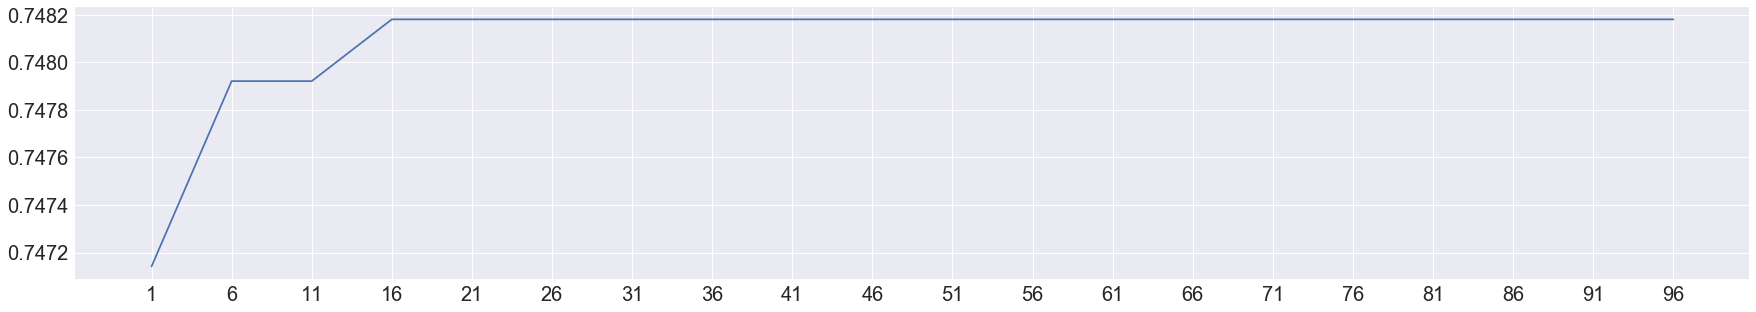

In [112]:
def train_fit(X_train_log, X_test_log, y_train_up, y_test_up,c):
    Lr = LogisticRegression(penalty = 'l1', dual=False, tol=0.0001, C=c, fit_intercept=True, intercept_scaling=1)
    Lr.fit(X_train_log, y_train_up)
    Lr_test_pred = Lr.predict(X_test_log)
    Lr_train_pred = Lr.predict(X_train_log)
    return accuracy_score(y_test_up,Lr_test_pred),accuracy_score(y_train_up, Lr_train_pred)

def log_iter(C):
    y_list_log = []
    for c in range(1,C,5):
        y_list_log.append(train_fit(X_train_log, X_test_log, y_train_up, y_test_up,c))
    
    plt.figure(figsize = (30,5));
    plt.plot([x for x in range(0,20)], [float(x[0]) for x in y_list_log]);
    plt.xticks([x for x in range(0,20)],[c for c in range(1,101,5)],fontsize = 20);
    plt.yticks(fontsize = 20);
    plt.show();
    
log_iter(101)

In [116]:
def Gaussian_NB(X_train_log, X_test_log, y_train_up, y_test_up):   
    nb = GaussianNB()
    nb.fit(X_train_log, y_train_up)
    nb_score = (accuracy_score(y_test_up, nb.predict(X_test_log)))
    print('GaussianNB Accuracy: ' + str(nb_score),classification_report(y_test_up, nb.predict(X_test_log)))
    print(metrics.confusion_matrix(y_test_up, nb.predict(X_test_log)))
Gaussian_NB(X_train_log, X_test_log, y_train_up, y_test_up)


GaussianNB Accuracy: 0.747661122661              precision    recall  f1-score   support

          1       0.76      0.95      0.85      2813
          3       0.60      0.19      0.29      1035

avg / total       0.72      0.75      0.70      3848

[[2679  134]
 [ 837  198]]


Run classification using Gaussian NB

In [117]:
nb = GaussianNB()
nb.fit(X_train_log, y_train_up)
vector = (lambda x: 1 if x =='1' else 0)
vfunc = np.vectorize(vector)
y_test_nb = vfunc(y_test_up)
y_pred_nb = vfunc(nb.predict(X_test_log))
precision_nb,recall_nb,_ = precision_recall_curve(y_test_nb,y_pred_nb)
precision_nb,recall_nb

(array([ 0.73102911,  0.76194539,  1.        ]),
 array([ 1.        ,  0.95236402,  0.        ]))

Run classifier using SVC

In [118]:
def SVC_(X_train_log, X_test_log, y_train_up, y_test_up): 
    svc = SVC()
    svc.fit(X_train_log, y_train_up)
    svc_score = (accuracy_score(y_test_up, svc.predict(X_test_log)))
    print('SVC Accuracy Score: ' + str(svc_score),classification_report(y_test_up, svc.predict(X_test_log)))
    print(metrics.confusion_matrix(y_test_up, svc.predict(X_test_log)))
SVC_(X_train_log, X_test_log, y_train_up, y_test_up)

SVC Accuracy Score: 0.753898128898              precision    recall  f1-score   support

          1       0.88      0.77      0.82      2813
          3       0.53      0.71      0.61      1035

avg / total       0.79      0.75      0.76      3848

[[2164  649]
 [ 298  737]]


In [119]:
svc = SVC()
svc.fit(X_train_log, y_train_up)
vector = (lambda x: 1 if x =='1' else 0)
vfunc = np.vectorize(vector)
y_test_svc = vfunc(y_test_up)
y_pred_svc = vfunc(svc.predict(X_test_log))
precision_svc,recall_svc,_ = precision_recall_curve(y_test_svc,y_pred_svc)
precision_svc,recall_svc

(array([ 0.73102911,  0.87896019,  1.        ]),
 array([ 1.        ,  0.76928546,  0.        ]))

Run classifier using KNN

In [138]:
def KNN_(X_train_log, X_test_log, y_train_up, y_test_up):    
    KNN = KNeighborsClassifier()
    KNN.fit(X_train_log, y_train_up)
    KNN_test_pred = KNN.predict(X_test_log)
    print('KNN Acccuracy:' + str(accuracy_score(y_test_up,KNN_test_pred)),classification_report(y_test_up, KNN.predict(X_test_log)))
    print(metrics.confusion_matrix(y_test_up, KNN.predict(X_test_log)))
    
    
KNN_(X_train_log, X_test_log, y_train_up, y_test_up)

KNN Acccuracy:0.662162162162              precision    recall  f1-score   support

          1       0.82      0.69      0.75      2813
          3       0.41      0.59      0.48      1035

avg / total       0.71      0.66      0.68      3848

[[1942  871]
 [ 429  606]]


In [139]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_log, y_train_up)
vector = (lambda x: 1 if x =='1' else 0)
vfunc = np.vectorize(vector)
y_test_KNN = vfunc(y_test_up)
y_pred_KNN = vfunc(KNN.predict(X_test_log))
precision_KNN,recall_KNN,_ = precision_recall_curve(y_test_KNN,y_pred_KNN)
av_pres_KNN = average_precision_score(y_test_KNN,y_pred_KNN,average="micro")
precision_KNN,recall_KNN,av_pres_KNN

(array([ 0.73102911,  0.81906369,  1.        ]),
 array([ 1.        ,  0.69036616,  0.        ]),
 0.79180520084179484)

Plot Precision Recal Curves

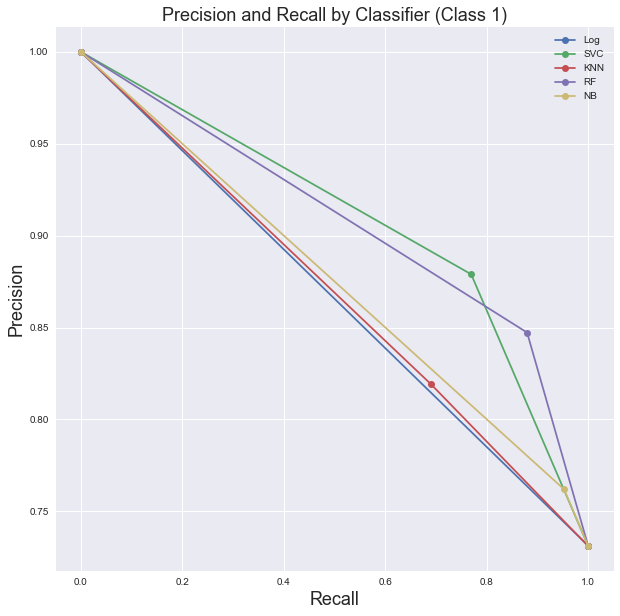

In [124]:
x, y = recall_log, precision_log
x1,y1 = recall_svc, precision_svc
x2,y2 = recall_KNN,precision_KNN
x3,y3 = recall_for, precision_for
x4,y4 = recall_nb, precision_nb
plt.figure(figsize = (10,10));
plt.plot(x, y,  label = 'Log',marker='o')
plt.plot(x1, y1, label = 'SVC',marker='o')
plt.plot(x2, y2, label = 'KNN',marker='o')
plt.plot(x3, y3, label = 'RF',marker='o')
plt.plot(x4, y4, label = 'NB',marker='o')
plt.xlabel('Recall',fontsize = 18);
plt.ylabel('Precision',fontsize = 18);
plt.title("Precision and Recall by Classifier (Class 1)",fontsize = 18);
plt.legend();
plt.show();